In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# importing the dataset
df = pd.read_excel(r"World_development_mesurement.xlsx")
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
df[df['Country']=='United States']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
204,0.014,NaN,5713560.0,United States,NaN,NaN,2273332.0,"$10,289,700,000,000",0.136,"$4,790",...,74.0,0.4,1,0.213,0.663,0.124,282162411,0.791,"$120,912,000,000","$91,473,000,000"
412,0.014,NaN,5601405.0,United States,NaN,NaN,2230817.0,"$10,625,300,000,000",0.142,"$5,138",...,74.0,0.4,1,0.212,0.665,0.123,284968955,0.792,"$109,103,000,000","$85,610,000,000"
620,0.014,NaN,5650950.0,United States,NaN,NaN,2255957.0,"$10,980,200,000,000",0.151,"$5,578",...,74.0,0.5,1,0.210,0.667,0.123,287625193,0.794,"$104,427,000,000","$81,860,000,000"
828,0.014,NaN,5681664.0,United States,6.0,NaN,2261151.0,"$11,512,200,000,000",0.156,"$5,993",...,75.0,0.5,1,0.209,0.669,0.123,290107933,0.796,"$101,535,000,000","$82,091,000,000"
1036,0.014,NaN,5790765.0,United States,6.0,NaN,2307819.0,"$12,277,000,000,000",0.157,"$6,355",...,75.0,0.6,1,0.207,0.670,0.123,292805298,0.798,"$115,689,000,000","$94,764,000,000"
1244,0.014,45.8%,5826394.0,United States,6.0,NaN,2318861.0,"$13,095,400,000,000",0.158,"$6,732",...,75.0,0.7,1,0.205,0.671,0.123,295516599,0.799,"$127,237,000,000","$100,250,000,000"
1452,0.014,47.4%,5737616.0,United States,6.0,NaN,2296686.0,"$13,857,900,000,000",0.159,"$7,110",...,75.0,0.8,1,0.204,0.672,0.124,298379912,0.801,"$133,393,000,000","$105,476,000,000"
1660,0.014,46.1%,5828697.0,United States,6.0,NaN,2337014.0,"$14,480,300,000,000",0.161,"$7,486",...,75.0,0.8,1,0.202,0.673,0.125,301231207,0.803,"$148,846,000,000","$111,102,000,000"
1868,0.014,46.4%,5656839.0,United States,5.0,NaN,2277034.0,"$14,720,300,000,000",0.165,"$7,769",...,76.0,0.9,1,0.201,0.673,0.127,304093966,0.804,"$170,524,000,000","$119,217,000,000"
2076,0.014,46.1%,5311840.0,United States,5.0,NaN,2164458.0,"$14,417,900,000,000",0.177,"$8,009",...,76.0,0.9,1,0.200,0.672,0.128,306771529,0.806,"$149,510,000,000","$106,285,000,000"


In [4]:
# descriptive analysis
df.shape

(2704, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
# Calculate the percentage of missing values for each feature
missing_values = df.isnull().sum() / len(df)

# Iterate through the features of the DataFrame
for column in df.columns:
  # Check if the percentage of missing values for the feature is greater than 60%
  if missing_values[column] > 0.6:
    # Print the name of the feature
    print(column)

Ease of Business


In [7]:
# Removing the column which is heavily empty
df = df.drop('Ease of Business', axis=1)

In [8]:
#changing the datatype from object to integer and converting the percentage into float
df['Business Tax Rate'] = df['Business Tax Rate'].str.rstrip('%').astype('float') / 100.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   object 
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   object 
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [10]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [11]:
# Removing all non-numerical values from the column
df['GDP'] = df['GDP'].str.replace('$','').str.replace(',','')
# Converting the column into numerice type
df['GDP'] = df['GDP'].astype(float)

In [12]:
# Removing all non-numerical values from the column
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$','').str.replace(',','')
# Converting the column into numerice type
df['Health Exp/Capita'] = df['Health Exp/Capita'].astype(float)

In [13]:
# Removing all non-numerical values from the column
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace('$','').str.replace(',','')
# Converting the column into numerice type
df['Tourism Inbound'] = df['Tourism Inbound'].astype(float)

In [14]:
# Removing all non-numerical values from the column
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace('$','').str.replace(',','')
# Converting the column into numerice type
df['Tourism Outbound'] = df['Tourism Outbound'].astype(float)

In [15]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,Angola,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,Benin,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,0.464,NaN,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,0.419,NaN,Uruguay,7.0,NaN,5.000435e+10,0.089,1308.0,310.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,0.619,NaN,"Venezuela, RB",144.0,NaN,3.812862e+11,0.046,593.0,792.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [17]:
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423.000000,2.125000e+03,1718.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,2444.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,0.489669,1.423071e+05,39.999418,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,0.032813,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,0.409541,6.159288e+05,57.318588,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,0.029968,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,0.082000,7.000000e+00,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,0.002000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,0.324000,1.360000e+03,13.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,0.009000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,0.410000,8.529000e+03,26.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,0.020000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,0.515500,5.910800e+04,45.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,0.053000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,3.391000,8.286892e+06,694.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,0.141000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


# Handling Missing Values

In [18]:
# Calculate skewness for all features
skewness = df.skew()

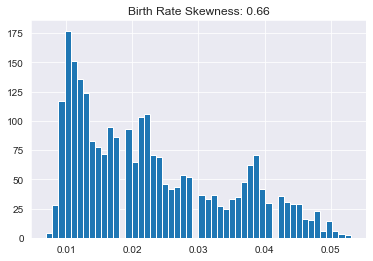

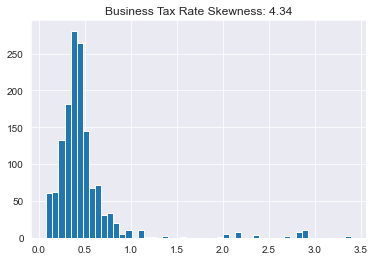

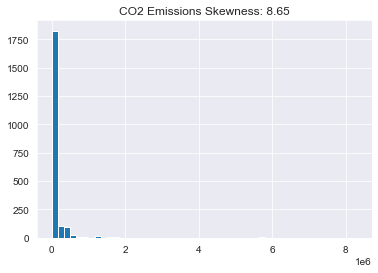

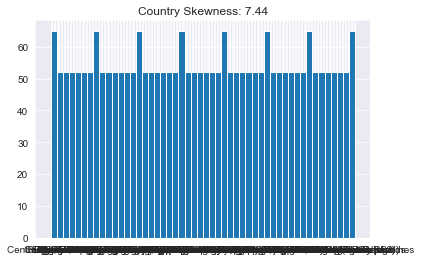

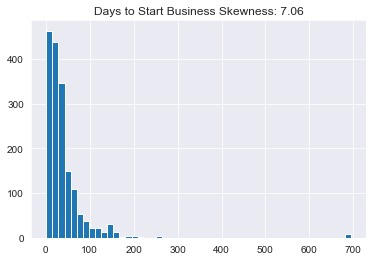

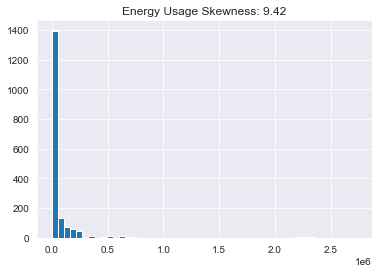

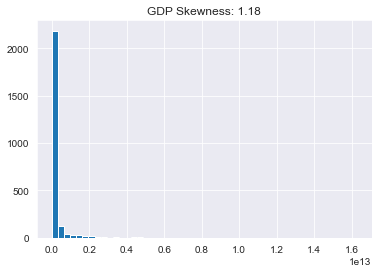

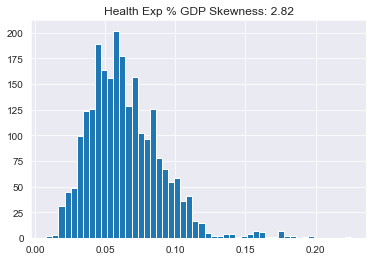

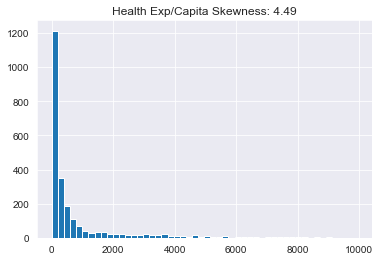

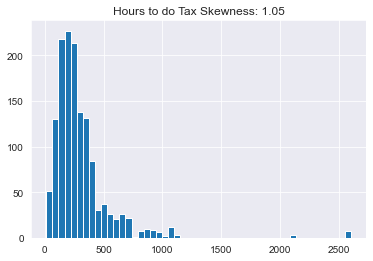

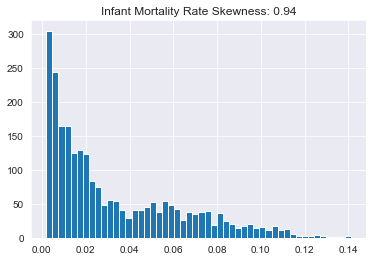

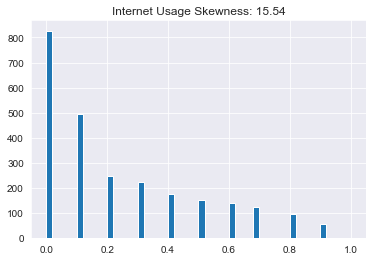

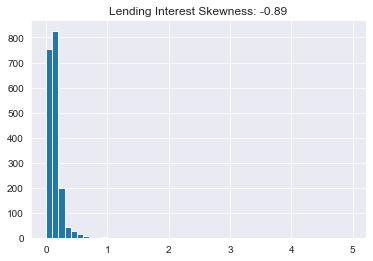

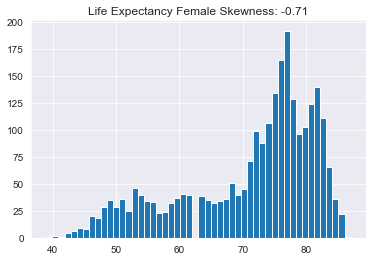

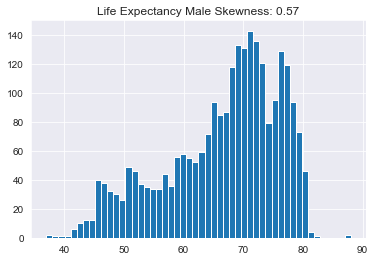

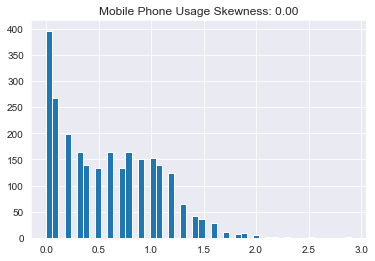

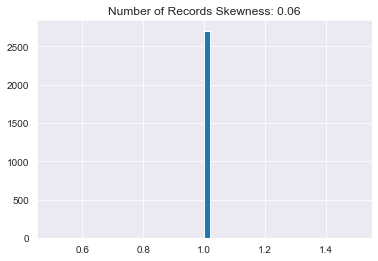

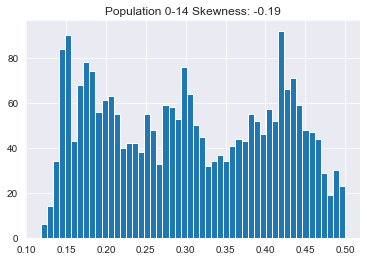

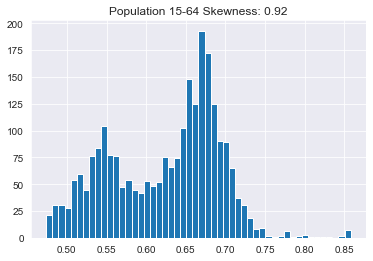

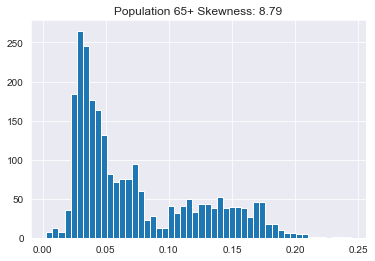

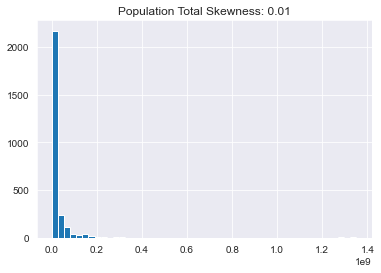

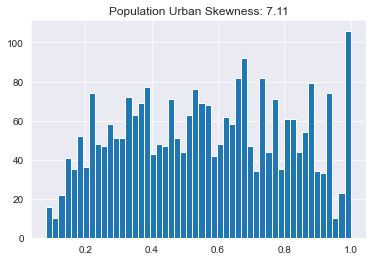

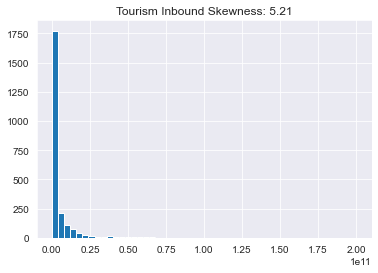

In [19]:
# Create a loop to plot the skewness of each feature
for i in range(len(skewness)):
    plt.hist(df[df.columns[i]], bins=50)
    plt.title(f'{df.columns[i]} Skewness: {skewness[i]:.2f}')
    plt.show()

As we can see that most of the columns are highly skewed we are gonna use knn imputer for imputing missing values

In [20]:
df['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Brunei Darussalam', 'Cambodia', 'China', 'Georgia',
       'Hong Kong SAR, China', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 

In [21]:
# Group the data by the 'Country' column
grouped_data = df.groupby(by='Country')

In [22]:
# Now you can perform different aggregation operation on this grouped data 
grouped_data.median()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0440,0.3630,1016.0,9.0,NaN,8.450724e+09,0.091,30.0,275.0,0.082,...,56.0,0.20,1.0,0.493,0.487,0.020,25631282.0,0.232,1.160000e+08,8.000000e+07
Albania,0.0140,0.4145,4056.0,22.5,2060.0,9.132562e+09,0.061,168.0,364.0,0.017,...,73.0,0.60,1.0,0.258,0.654,0.089,2968028.0,0.478,1.057000e+09,9.890000e+08
Algeria,0.0220,0.7290,103963.0,25.0,33496.5,1.170267e+11,0.037,106.0,451.0,0.028,...,68.0,0.60,1.0,0.282,0.673,0.045,34507214.0,0.646,3.000000e+08,5.040000e+08
American Samoa,0.0205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,1.0,NaN,NaN,NaN,57919.0,0.880,NaN,NaN
Andorra,0.0105,NaN,535.0,NaN,NaN,2.322164e+09,0.062,2631.0,NaN,0.003,...,NaN,0.80,1.0,NaN,NaN,NaN,78360.0,0.898,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.0170,0.3990,97942.0,39.0,41965.0,6.637166e+10,0.060,46.0,1050.0,0.023,...,70.0,0.20,1.0,0.263,0.672,0.065,83313000.0,0.279,3.400000e+09,1.260000e+09
Virgin Islands (U.S.),0.0130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,0.45,1.0,0.219,0.662,0.111,107700.0,0.939,1.234000e+09,NaN
"Yemen, Rep.",0.0350,0.4780,20044.0,51.5,6801.5,1.908173e+10,0.049,52.0,248.0,0.054,...,60.0,0.10,1.0,0.449,0.524,0.027,20661714.0,0.295,1.810000e+08,2.245000e+08


In [23]:
# Group the data by the 'Country' column
grouped_data = df.groupby(by='Country')

# Iterate through the columns of the DataFrame
for col in df.columns:
    if col != 'Country':
        # Fill missing values with the median of the group
        df[col] = grouped_data[col].transform(lambda x: x.fillna(x.median()))

In [24]:
# Iterate through the columns of the DataFrame
for col in df.columns:
    if col != 'Country':
        # Fill missing values with the median of the group
        df[col].fillna(df.groupby('Country')[col].transform('median'),inplace=True)

In [25]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,0.7290,87931.0,Algeria,25.0,26998.0,5.479006e+10,0.035,60.0,451.0,...,67.0,0.00,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,0.5210,9542.0,Angola,93.5,7499.0,9.129595e+09,0.034,22.0,272.0,...,44.0,0.00,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,0.7320,1617.0,Benin,31.0,1983.0,2.359122e+09,0.043,15.0,270.0,...,53.0,0.00,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,0.1710,4276.0,Botswana,92.0,1836.0,5.788312e+09,0.047,152.0,140.0,...,49.0,0.10,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,0.4485,1041.0,Burkina Faso,17.0,NaN,2.610959e+09,0.051,12.0,270.0,...,49.0,0.00,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,121.0,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,2.920000e+08,NaN
2700,0.013,0.4640,5681664.0,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,76.0,1.00,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,0.4190,5776.0,Uruguay,7.0,3132.0,5.000435e+10,0.089,1308.0,310.0,...,74.0,1.50,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,0.6190,181630.0,"Venezuela, RB",144.0,63319.5,3.812862e+11,0.046,593.0,792.0,...,72.0,1.00,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2678 non-null   float64
 1   Business Tax Rate       2405 non-null   float64
 2   CO2 Emissions           2535 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  2405 non-null   float64
 5   Energy Usage            2171 non-null   float64
 6   GDP                     2561 non-null   float64
 7   Health Exp % GDP        2405 non-null   float64
 8   Health Exp/Capita       2405 non-null   float64
 9   Hours to do Tax         2405 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2587 non-null   float64
 12  Lending Interest        2119 non-null   float64
 13  Life Expectancy Female  2639 non-null   float64
 14  Life Expectancy Male    2639 non-null   

In [27]:
df.isna().sum()

Birth Rate                 26
Business Tax Rate         299
CO2 Emissions             169
Country                     0
Days to Start Business    299
Energy Usage              533
GDP                       143
Health Exp % GDP          299
Health Exp/Capita         299
Hours to do Tax           299
Infant Mortality Rate     260
Internet Usage            117
Lending Interest          585
Life Expectancy Female     65
Life Expectancy Male       65
Mobile Phone Usage         65
Number of Records           0
Population 0-14           208
Population 15-64          208
Population 65+            208
Population Total            0
Population Urban           26
Tourism Inbound           208
Tourism Outbound          286
dtype: int64

In [28]:
# Find the rows with missing values
missing_rows = df.isna()

# Find the rows that contain at least one missing value
missing_rows = missing_rows[missing_rows.any(axis=1)]

#print the number of missing rows and their index
print(missing_rows.shape[0])
print(missing_rows.index)

897
Int64Index([   2,    4,    5,    7,    8,   12,   16,   20,   21,   22,
            ...
            2673, 2674, 2675, 2679, 2691, 2692, 2693, 2695, 2699, 2703],
           dtype='int64', length=897)


In [29]:
# Create a new column to store the original index of the dataframe
df['original_index'] = df.index

# Sort the dataframe by the Country column
df_sorted = df.sort_values(by='Country')
df_sorted = df_sorted.drop("Country",axis=1)

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df_sorted), columns=df_sorted.columns)

# Re-sort the dataframe based on the original_index column
df_imputed = df_imputed.sort_values(by='original_index')

# Drop the original_index column
df_imputed.drop('original_index', axis=1, inplace=True)

In [30]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,original_index
0,0.020,0.7290,87931.0,Algeria,25.0,26998.0,5.479006e+10,0.035,60.0,451.0,...,0.00,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,0.5210,9542.0,Angola,93.5,7499.0,9.129595e+09,0.034,22.0,272.0,...,0.00,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,0.7320,1617.0,Benin,31.0,1983.0,2.359122e+09,0.043,15.0,270.0,...,0.00,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,2
3,0.027,0.1710,4276.0,Botswana,92.0,1836.0,5.788312e+09,0.047,152.0,140.0,...,0.10,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,3
4,0.046,0.4485,1041.0,Burkina Faso,17.0,NaN,2.610959e+09,0.051,12.0,270.0,...,0.00,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,121.0,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,32427,0.911,2.920000e+08,NaN,2699
2700,0.013,0.4640,5681664.0,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.00,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2700
2701,0.015,0.4190,5776.0,Uruguay,7.0,3132.0,5.000435e+10,0.089,1308.0,310.0,...,1.50,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2701
2702,0.020,0.6190,181630.0,"Venezuela, RB",144.0,63319.5,3.812862e+11,0.046,593.0,792.0,...,1.00,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,2702


In [31]:
df_imputed

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
33,0.020,0.7290,87931.0,25.0,26998.00,5.479006e+10,0.035,60.0,451.0,0.034,...,67.0,0.00,1.0,0.342,0.6190,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08
77,0.050,0.5210,9542.0,93.5,7499.00,9.129595e+09,0.034,22.0,272.0,0.128,...,44.0,0.00,1.0,0.476,0.4990,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08
263,0.043,0.7320,1617.0,31.0,1983.00,2.359122e+09,0.043,15.0,270.0,0.090,...,53.0,0.00,1.0,0.454,0.5170,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07
325,0.027,0.1710,4276.0,92.0,1836.00,5.788312e+09,0.047,152.0,140.0,0.054,...,49.0,0.10,1.0,0.383,0.5870,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08
377,0.046,0.4485,1041.0,17.0,20043.00,2.610959e+09,0.051,12.0,270.0,0.096,...,49.0,0.00,1.0,0.468,0.5050,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,0.010,0.4220,121.0,40.0,354.25,1.317358e+09,0.060,3672.5,52.0,0.003,...,79.5,1.15,1.0,0.304,0.6415,0.0545,32427.0,0.911,2.920000e+08,6.350000e+07
2583,0.013,0.4640,5681664.0,5.0,2132446.00,1.624460e+13,0.179,8895.0,175.0,0.006,...,76.0,1.00,1.0,0.196,0.6670,0.1360,313873685.0,0.811,2.000920e+11,1.265730e+11
2596,0.015,0.4190,5776.0,7.0,3132.00,5.000435e+10,0.089,1308.0,310.0,0.010,...,74.0,1.50,1.0,0.220,0.6390,0.1400,3395253.0,0.948,2.222000e+09,1.028000e+09
2633,0.020,0.6190,181630.0,144.0,63319.50,3.812862e+11,0.046,593.0,792.0,0.013,...,72.0,1.00,1.0,0.288,0.6520,0.0600,29954782.0,0.889,9.040000e+08,3.202000e+09


In [32]:
# Reset the index
df_imputed = df_imputed.reset_index(drop=True)

In [33]:
df_imputed

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,0.7290,87931.0,25.0,26998.00,5.479006e+10,0.035,60.0,451.0,0.034,...,67.0,0.00,1.0,0.342,0.6190,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050,0.5210,9542.0,93.5,7499.00,9.129595e+09,0.034,22.0,272.0,0.128,...,44.0,0.00,1.0,0.476,0.4990,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043,0.7320,1617.0,31.0,1983.00,2.359122e+09,0.043,15.0,270.0,0.090,...,53.0,0.00,1.0,0.454,0.5170,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027,0.1710,4276.0,92.0,1836.00,5.788312e+09,0.047,152.0,140.0,0.054,...,49.0,0.10,1.0,0.383,0.5870,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046,0.4485,1041.0,17.0,20043.00,2.610959e+09,0.051,12.0,270.0,0.096,...,49.0,0.00,1.0,0.468,0.5050,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.010,0.4220,121.0,40.0,354.25,1.317358e+09,0.060,3672.5,52.0,0.003,...,79.5,1.15,1.0,0.304,0.6415,0.0545,32427.0,0.911,2.920000e+08,6.350000e+07
2700,0.013,0.4640,5681664.0,5.0,2132446.00,1.624460e+13,0.179,8895.0,175.0,0.006,...,76.0,1.00,1.0,0.196,0.6670,0.1360,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015,0.4190,5776.0,7.0,3132.00,5.000435e+10,0.089,1308.0,310.0,0.010,...,74.0,1.50,1.0,0.220,0.6390,0.1400,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020,0.6190,181630.0,144.0,63319.50,3.812862e+11,0.046,593.0,792.0,0.013,...,72.0,1.00,1.0,0.288,0.6520,0.0600,29954782.0,0.889,9.040000e+08,3.202000e+09


In [34]:
df1 = df_imputed

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   Business Tax Rate       2704 non-null   float64
 2   CO2 Emissions           2704 non-null   float64
 3   Days to Start Business  2704 non-null   float64
 4   Energy Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health Exp % GDP        2704 non-null   float64
 7   Health Exp/Capita       2704 non-null   float64
 8   Hours to do Tax         2704 non-null   float64
 9   Infant Mortality Rate   2704 non-null   float64
 10  Internet Usage          2704 non-null   float64
 11  Lending Interest        2704 non-null   float64
 12  Life Expectancy Female  2704 non-null   float64
 13  Life Expectancy Male    2704 non-null   float64
 14  Mobile Phone Usage      2704 non-null   

In [36]:
df1 = df1.join(df['Country'])

In [37]:
df1.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country                   0
dtype: int64

In [38]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,original_index
0,0.020,0.7290,87931.0,Algeria,25.0,26998.0,5.479006e+10,0.035,60.0,451.0,...,0.00,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,0.5210,9542.0,Angola,93.5,7499.0,9.129595e+09,0.034,22.0,272.0,...,0.00,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,0.7320,1617.0,Benin,31.0,1983.0,2.359122e+09,0.043,15.0,270.0,...,0.00,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,2
3,0.027,0.1710,4276.0,Botswana,92.0,1836.0,5.788312e+09,0.047,152.0,140.0,...,0.10,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,3
4,0.046,0.4485,1041.0,Burkina Faso,17.0,NaN,2.610959e+09,0.051,12.0,270.0,...,0.00,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,121.0,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,32427,0.911,2.920000e+08,NaN,2699
2700,0.013,0.4640,5681664.0,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.00,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2700
2701,0.015,0.4190,5776.0,Uruguay,7.0,3132.0,5.000435e+10,0.089,1308.0,310.0,...,1.50,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2701
2702,0.020,0.6190,181630.0,"Venezuela, RB",144.0,63319.5,3.812862e+11,0.046,593.0,792.0,...,1.00,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,2702


In [39]:
df1

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0.020,0.7290,87931.0,25.0,26998.00,5.479006e+10,0.035,60.0,451.0,0.034,...,0.00,1.0,0.342,0.6190,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050,0.5210,9542.0,93.5,7499.00,9.129595e+09,0.034,22.0,272.0,0.128,...,0.00,1.0,0.476,0.4990,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043,0.7320,1617.0,31.0,1983.00,2.359122e+09,0.043,15.0,270.0,0.090,...,0.00,1.0,0.454,0.5170,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027,0.1710,4276.0,92.0,1836.00,5.788312e+09,0.047,152.0,140.0,0.054,...,0.10,1.0,0.383,0.5870,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046,0.4485,1041.0,17.0,20043.00,2.610959e+09,0.051,12.0,270.0,0.096,...,0.00,1.0,0.468,0.5050,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.010,0.4220,121.0,40.0,354.25,1.317358e+09,0.060,3672.5,52.0,0.003,...,1.15,1.0,0.304,0.6415,0.0545,32427.0,0.911,2.920000e+08,6.350000e+07,Turks and Caicos Islands
2700,0.013,0.4640,5681664.0,5.0,2132446.00,1.624460e+13,0.179,8895.0,175.0,0.006,...,1.00,1.0,0.196,0.6670,0.1360,313873685.0,0.811,2.000920e+11,1.265730e+11,United States
2701,0.015,0.4190,5776.0,7.0,3132.00,5.000435e+10,0.089,1308.0,310.0,0.010,...,1.50,1.0,0.220,0.6390,0.1400,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,0.020,0.6190,181630.0,144.0,63319.50,3.812862e+11,0.046,593.0,792.0,0.013,...,1.00,1.0,0.288,0.6520,0.0600,29954782.0,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [40]:
df2 = df1.drop('Country',axis=1)

In [41]:
df2

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,0.7290,87931.0,25.0,26998.00,5.479006e+10,0.035,60.0,451.0,0.034,...,67.0,0.00,1.0,0.342,0.6190,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050,0.5210,9542.0,93.5,7499.00,9.129595e+09,0.034,22.0,272.0,0.128,...,44.0,0.00,1.0,0.476,0.4990,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043,0.7320,1617.0,31.0,1983.00,2.359122e+09,0.043,15.0,270.0,0.090,...,53.0,0.00,1.0,0.454,0.5170,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027,0.1710,4276.0,92.0,1836.00,5.788312e+09,0.047,152.0,140.0,0.054,...,49.0,0.10,1.0,0.383,0.5870,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046,0.4485,1041.0,17.0,20043.00,2.610959e+09,0.051,12.0,270.0,0.096,...,49.0,0.00,1.0,0.468,0.5050,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.010,0.4220,121.0,40.0,354.25,1.317358e+09,0.060,3672.5,52.0,0.003,...,79.5,1.15,1.0,0.304,0.6415,0.0545,32427.0,0.911,2.920000e+08,6.350000e+07
2700,0.013,0.4640,5681664.0,5.0,2132446.00,1.624460e+13,0.179,8895.0,175.0,0.006,...,76.0,1.00,1.0,0.196,0.6670,0.1360,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015,0.4190,5776.0,7.0,3132.00,5.000435e+10,0.089,1308.0,310.0,0.010,...,74.0,1.50,1.0,0.220,0.6390,0.1400,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020,0.6190,181630.0,144.0,63319.50,3.812862e+11,0.046,593.0,792.0,0.013,...,72.0,1.00,1.0,0.288,0.6520,0.0600,29954782.0,0.889,9.040000e+08,3.202000e+09


We have Treated all the  missing values and our final datasets are df1 with country column and df2 without the country column


# Checking for Outliers

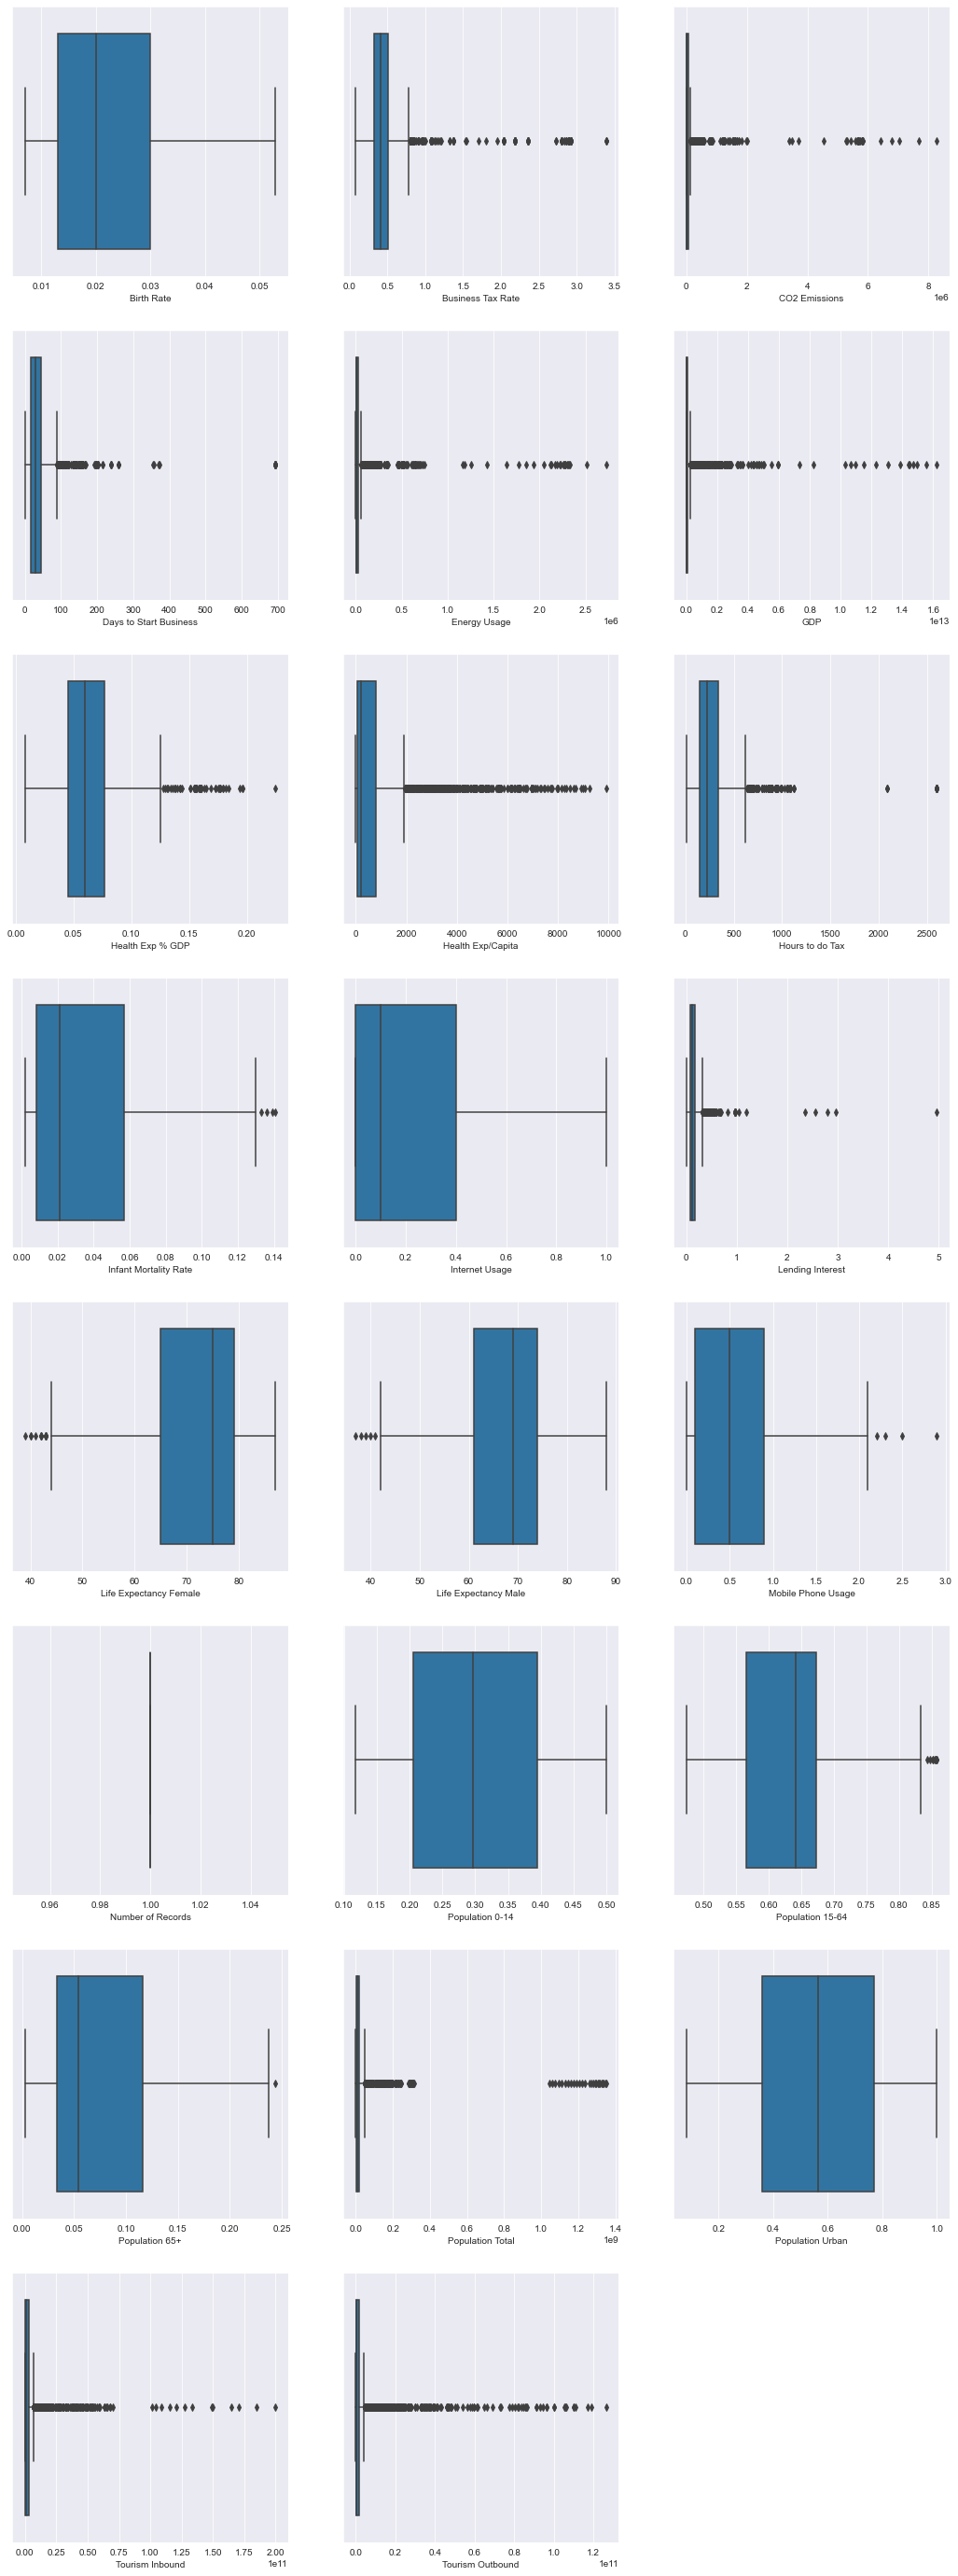

In [42]:
plt.figure(figsize=(18,50))
i = 1

for col in df1.columns[0:23]:
    plt.subplot(8,3,i)
    sns.boxplot(df1[col]) 
    i = i + 1

 As we see large number of outliers, deleting them can result in loss of imp info.. so we retain them

# Insights

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2678 non-null   float64
 1   Business Tax Rate       2405 non-null   float64
 2   CO2 Emissions           2535 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  2405 non-null   float64
 5   Energy Usage            2171 non-null   float64
 6   GDP                     2561 non-null   float64
 7   Health Exp % GDP        2405 non-null   float64
 8   Health Exp/Capita       2405 non-null   float64
 9   Hours to do Tax         2405 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2587 non-null   float64
 12  Lending Interest        2119 non-null   float64
 13  Life Expectancy Female  2639 non-null   float64
 14  Life Expectancy Male    2639 non-null   

In [44]:
list = []
list1 = []
for country in df['Country'].unique():
    
    mean = df[df['Country'] == country]['CO2 Emissions'].mean()
    list1.append(mean)
    list.append(country)

In [45]:
df_co2 = pd.DataFrame()
df_co2['Country'] = list
df_co2['Avg. CO2 emissions'] = list1 
df_co2.dropna(inplace=True)
df_co2['CO2 emissions in %'] = df_co2['Avg. CO2 emissions']/ sum(df_co2['Avg. CO2 emissions'])  * 100 
df_co2 = df_co2.sort_values(by=['Avg. CO2 emissions'], ascending=False) 
df_co2 = df_co2.reset_index()
df_co2.drop(columns=['index'], inplace=True) 
df_co2 # countries listed according ti their avg CO2 emissions 

,Country,Avg. CO2 emissions,CO2 emissions in %
0,China,5.691631e+06,20.676236
1,United States,5.661240e+06,20.565833
2,Russian Federation,1.621181e+06,5.889337
3,India,1.492251e+06,5.420966
4,Japan,1.213367e+06,4.407851
...,...,...,...
190,Marshall Islands,9.000000e+01,0.000327
191,Vanuatu,8.315385e+01,0.000302
192,Sao Tome and Principe,7.469231e+01,0.000271
193,Kiribati,4.700000e+01,0.000171


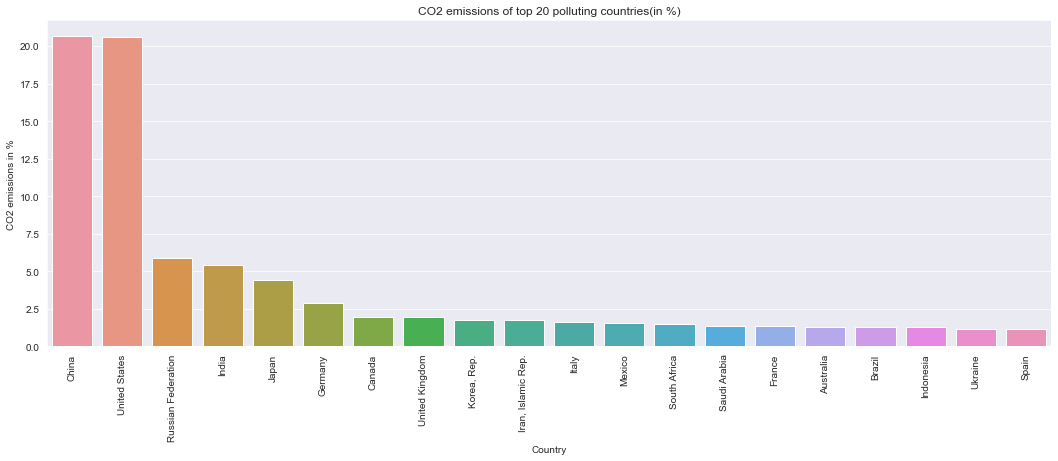

In [46]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_co2['Country'].head(20), y=df_co2['CO2 emissions in %'].head(20))
plt.xticks(rotation = 90) 
plt.title('CO2 emissions of top 20 polluting countries(in %)') 
plt.show() 

China, USA, Russia, India accounts for 50% of CO2 emissions of the world

In [47]:
list = []
list1 = []
for country in df['Country'].unique():
    
    mean = df[df['Country'] == country]['GDP'].mean()
    list1.append(mean)
    list.append(country)

In [48]:
df_gdp = pd.DataFrame()
df_gdp['Country'] = list
df_gdp['Avg. GDP'] = list1 
df_gdp.dropna(inplace=True)
df_gdp['GDP in %'] = df_gdp['Avg. GDP']/ sum(df_gdp['Avg. GDP'])  * 100 

df_gdp = df_gdp.sort_values(by=['Avg. GDP'], ascending=False) 
df_gdp = df_gdp.reset_index()
df_gdp.drop(columns=['index'], inplace=True) 
df_gdp # countries listed according t0 their avg gdp  

,Country,Avg. GDP,GDP in %
0,United States,1.330715e+13,26.253581
1,Japan,4.795284e+12,9.460585
2,China,3.615967e+12,7.133917
3,Germany,2.861328e+12,5.645095
4,United Kingdom,2.190205e+12,4.321041
...,...,...,...
192,Tonga,2.905719e+08,0.000573
193,"Micronesia, Fed. Sts.",2.636554e+08,0.000520
194,Sao Tome and Principe,1.496316e+08,0.000295
195,Marshall Islands,1.423456e+08,0.000281


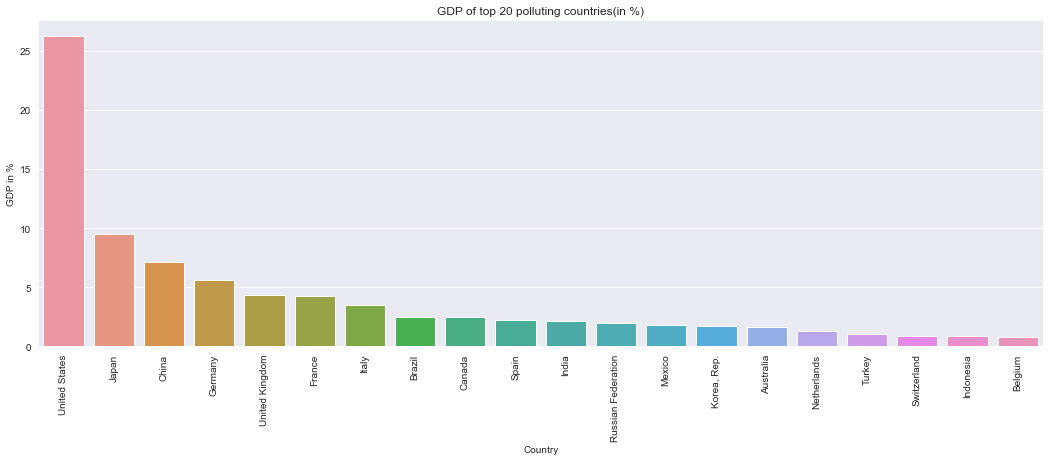

In [49]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_gdp['Country'].head(20), y=df_gdp['GDP in %'].head(20))
plt.xticks(rotation = 90) 
plt.title('GDP of top 20 polluting countries(in %)') 
plt.show() 

As we can see that USA has the highest GDP followed by Japan and China 

In [50]:
list = []
list1 = []
list2 = []
for country in df['Country'].unique():    
    mean = df[df['Country'] == country]['Birth Rate'].mean()
    mean1 = df[df['Country'] == country]['Infant Mortality Rate'].mean()
    list.append(country)
    list1.append(mean)
    list2.append(mean1)

In [51]:
df_imr = pd.DataFrame()
df_imr['Country'] = list
df_imr['Avg. birth rate'] = list1 
df_imr['Avg. IMR'] = list2 
df_imr.dropna(inplace=True)
df_imr = df_imr.sort_values(by=['Avg. IMR'], ascending = True) 
df_imr = df_imr.reset_index()
df_imr.drop(columns=['index'], inplace=True) 
df_imr # countries listed according t0 their avg imr  

,Country,Avg. birth rate,Avg. IMR
0,Singapore,0.010385,0.002308
1,Iceland,0.014538,0.002385
2,Japan,0.008769,0.002692
3,Luxembourg,0.011769,0.002692
4,Sweden,0.011385,0.002846
...,...,...,...
182,Somalia,0.046538,0.101923
183,"Congo, Dem. Rep.",0.045538,0.102308
184,Central African Republic,0.036769,0.107923
185,Angola,0.048308,0.118154


In [52]:
df_imr_top_bottom = df_imr.head(5) 
df_imr_top_bottom = df_imr_top_bottom.append(df_imr.tail(5))

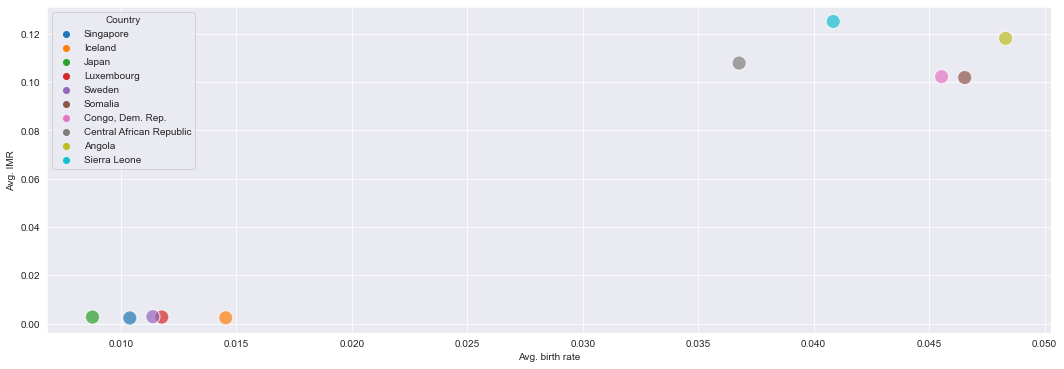

In [53]:
plt.figure(figsize=(18,6)) 
sns.scatterplot(df_imr_top_bottom['Avg. birth rate'], df_imr_top_bottom['Avg. IMR'], hue=df_imr_top_bottom['Country'], s=200, alpha=0.7)
plt.show()

Countries like Singapore, Iceland, Japan, Luxmeborug and Sweden countries have highest standards of population health, where as countries like Central African Republic, Angola and Sierra Leone etc severely lack health facilities.

In [54]:
list = []
list1 = []
list2 = []
for country in df['Country'].unique():    
    mean = df[df['Country'] == country]['Life Expectancy Male'].mean()
    mean1 = df[df['Country'] == country]['Life Expectancy Female'].mean()
    list.append(country)
    list1.append(mean)
    list2.append(mean1)

In [55]:
df_life_exp = pd.DataFrame()
df_life_exp['Country'] = list
df_life_exp['Life Expectancy Male'] = list1 
df_life_exp['Life Expectancy Female'] = list2 
df_life_exp.dropna(inplace=True)
df_life_exp = df_life_exp.sort_values(by=['Life Expectancy Female'], ascending = False) 
df_life_exp = df_life_exp.reset_index()
df_life_exp.drop(columns=['index'], inplace=True) 
df_life_exp # countries listed according t0 their avg life_exp  

,Country,Life Expectancy Male,Life Expectancy Female
0,Japan,78.923077,85.615385
1,"Hong Kong SAR, China",79.230769,85.384615
2,San Marino,79.000000,85.153846
3,France,77.230769,84.384615
4,Italy,78.461538,84.153846
...,...,...,...
198,Botswana,47.076923,47.538462
199,Zimbabwe,47.615385,47.461538
200,Swaziland,47.307692,47.230769
201,Lesotho,45.538462,46.000000


In [56]:
plot = df_life_exp.head(10)
plot1 = df_life_exp.sort_values(by='Life Expectancy Male', ascending=False)
plot2 = df_life_exp.sort_values(by='Life Expectancy Female', ascending=False)
plot1 = plot1.head()
plot2 = plot2.head()

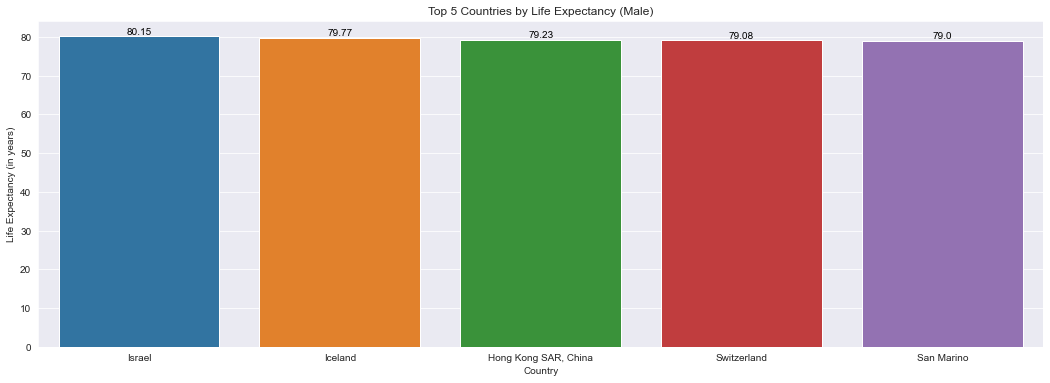

In [57]:
plt.figure(figsize=(18,6)) 
sns.barplot(x='Country', y='Life Expectancy Male', data=plot1)

for i, value in enumerate(plot1['Life Expectancy Male']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')

plt.title('Top 5 Countries by Life Expectancy (Male)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (in years)')

# Show the plot
plt.show()

Here are the top 5 Countries according to life expectancy of Male.

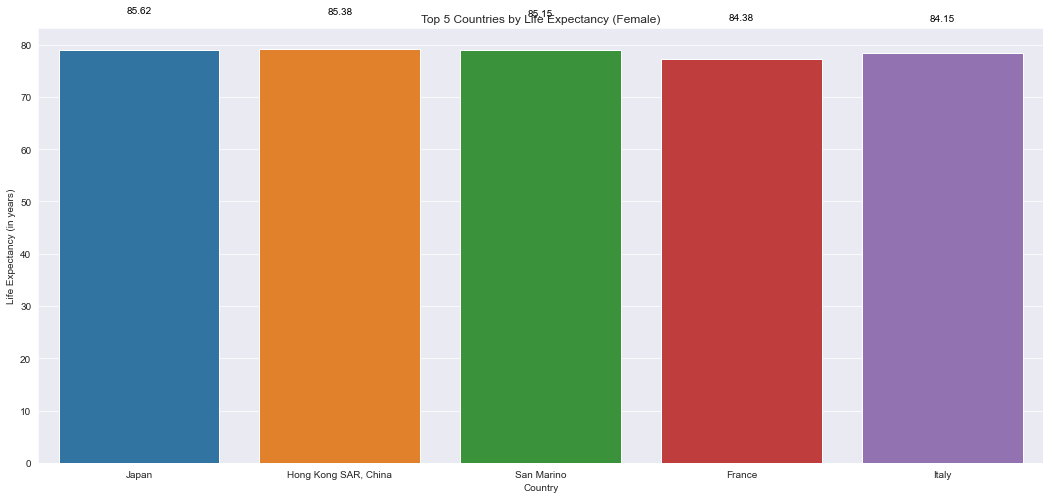

In [58]:
plt.figure(figsize=(18,8)) 
sns.barplot(x='Country', y='Life Expectancy Male', data=plot2)

for i, value in enumerate(plot2['Life Expectancy Female']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')

plt.title('Top 5 Countries by Life Expectancy (Female)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (in years)')

# Show the plot
plt.show()

Here are the top 5 Countries according to life expectancy of Female.

In [59]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean = df[df['Country'] == country]['Health Exp/Capita'].mean()
    list.append(country)
    list1.append(mean) 

In [60]:
df_health_expd = pd.DataFrame()
df_health_expd['Country'] = list
df_health_expd['Health Exp/Capita'] = list1
df_health_expd.dropna(inplace=True)
df_health_expd = df_health_expd.sort_values(by=['Health Exp/Capita'], ascending = False) 
df_health_expd = df_health_expd.reset_index()
df_health_expd.drop(columns=['index'], inplace=True) 
df_health_expd # countries listed according t0 their avg health_expd   

,Country,Health Exp/Capita
0,United States,6967.384615
1,Norway,6752.615385
2,Luxembourg,6330.615385
3,Switzerland,6135.615385
4,Monaco,5125.769231
...,...,...
180,Burundi,13.230769
181,"Congo, Dem. Rep.",10.846154
182,Ethiopia,9.923077
183,Eritrea,8.692308


In [61]:
df_health_expd_top_bottom = df_health_expd.head(5) 
df_health_expd_top_bottom = df_health_expd_top_bottom .append(df_health_expd.tail(5)) 

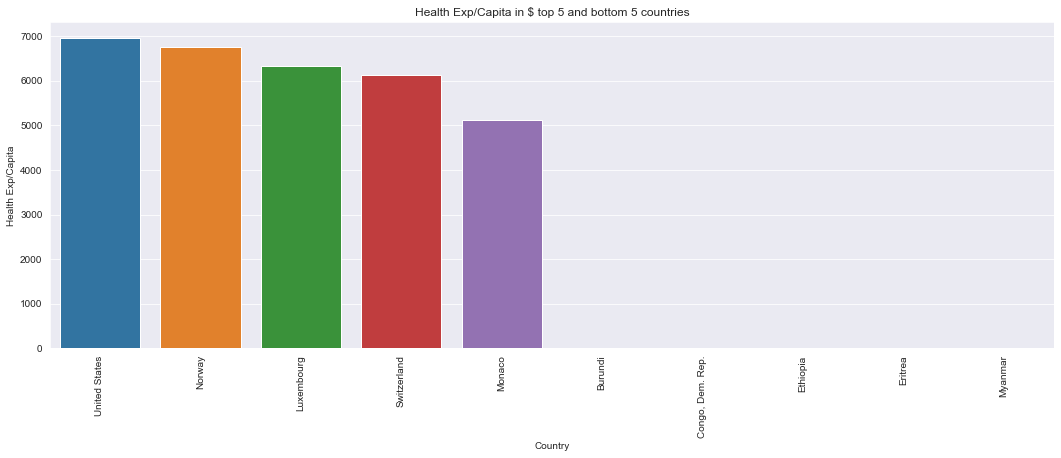

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(df_health_expd_top_bottom['Country'] , df_health_expd_top_bottom['Health Exp/Capita'])
plt.xticks(rotation = 90) 
plt.title('Health Exp/Capita in $ top 5 and bottom 5 countries') 
plt.show()

Health Expenditure is the financial resources that a country devotes to health care, both for individuals and for the population as a whole. It indicates government and total expenditure on health resources, access and services and nutrition. Here are the top 5 and bottom 5 Countries according to our dataset

In [63]:
list = []
list1 = []
list2 = []
list3 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Population 0-14'].mean()
    mean2 = df[df['Country'] == country]['Population 15-64'].mean()
    mean3 = df[df['Country'] == country]['Population 65+'].mean()
    list.append(country)
    list1.append(mean1)
    list2.append(mean2)
    list3.append(mean3)

In [64]:
df_demo = pd.DataFrame()
df_demo['Country'] = list
df_demo['Population 0-14'] = list1
df_demo['Population 15-64'] = list2 
df_demo['Population 65+'] = list3
df_demo.dropna(inplace=True)

In [65]:
df_demo

,Country,Population 0-14,Population 15-64,Population 65+
0,Algeria,0.292692,0.663077,0.044231
1,Angola,0.477538,0.498154,0.024462
2,Benin,0.442615,0.528846,0.028538
3,Botswana,0.356769,0.610769,0.032615
4,Burkina Faso,0.463385,0.510846,0.025692
...,...,...,...,...
202,Trinidad and Tobago,0.221154,0.703615,0.075154
204,United States,0.204154,0.669385,0.126385
205,Uruguay,0.234385,0.629769,0.135846
206,"Venezuela, RB",0.310538,0.637692,0.051615


In [66]:
df_demo_1 = df_demo.sort_values(by=['Population 0-14'], ascending = False)
df_demo_1 = df_demo_1.head()
df_demo_15 = df_demo.sort_values(by=['Population 15-64'], ascending = False)
df_demo_15 = df_demo_15.head()
df_demo_65 = df_demo.sort_values(by=['Population 65+'], ascending = False)
df_demo_65 = df_demo_65.head()

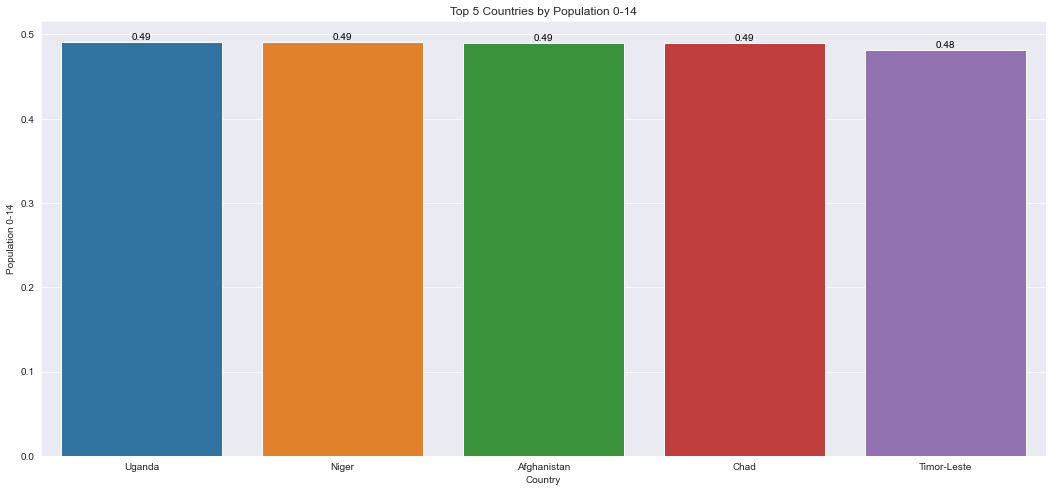

In [67]:
plt.figure(figsize=(18,8)) 
sns.barplot(x='Country', y='Population 0-14', data=df_demo_1)

for i, value in enumerate(df_demo_1['Population 0-14']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')

plt.title('Top 5 Countries by Population 0-14')
plt.xlabel('Country')
plt.ylabel('Population 0-14')

# Show the plot
plt.show()

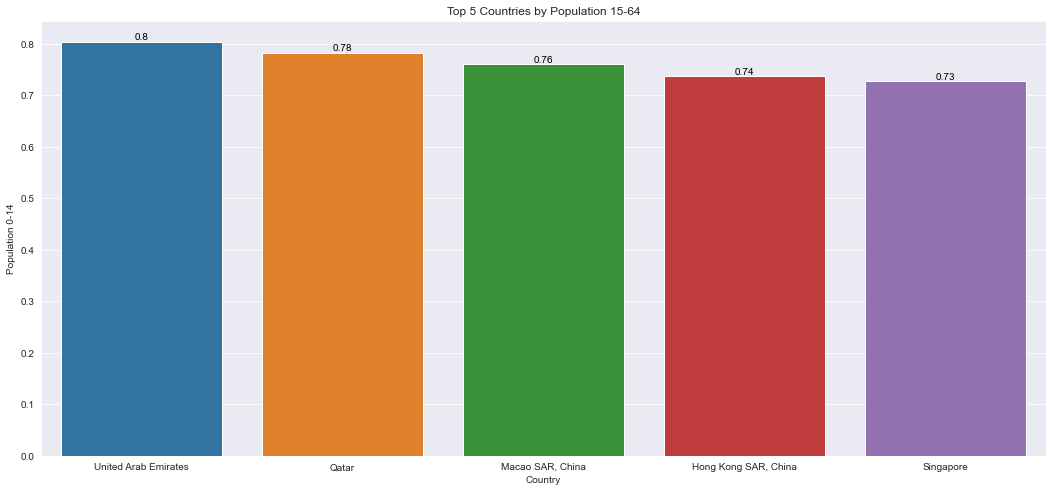

In [68]:
plt.figure(figsize=(18,8)) 
sns.barplot(x='Country', y='Population 15-64', data=df_demo_15)

for i, value in enumerate(df_demo_15['Population 15-64']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')

plt.title('Top 5 Countries by Population 15-64')
plt.xlabel('Country')
plt.ylabel('Population 0-14')

# Show the plot
plt.show()

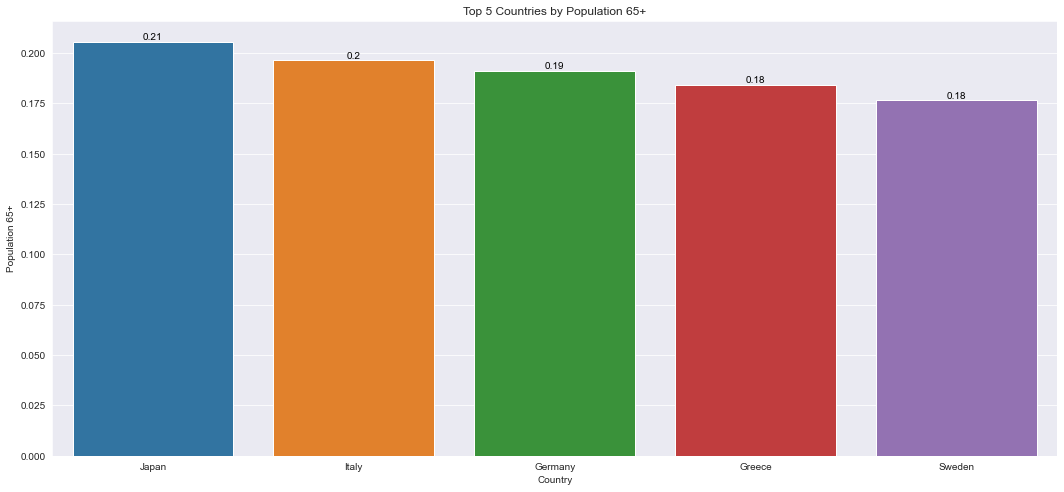

In [69]:
plt.figure(figsize=(18,8)) 
sns.barplot(x='Country', y='Population 65+', data=df_demo_65)

for i, value in enumerate(df_demo_65['Population 65+']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')

plt.title('Top 5 Countries by Population 65+')
plt.xlabel('Country')
plt.ylabel('Population 65+')

# Show the plot
plt.show()

Above are the charts representing top 5 countries for the age groups present in the dataset

In [70]:
list = []
list1 = []
for country in df['Country'].unique():
    
    mean = df[df['Country'] == country]['Population Total'].mean()
    list1.append(mean)
    list.append(country) 

In [71]:
df_pop = pd.DataFrame()
df_pop['Country'] = list
df_pop['Avg. Total Population'] = list1 
df_pop['Pop in %'] = df_pop['Avg. Total Population']/ sum(df_pop['Avg. Total Population'])  * 100 
df_pop = df_pop.sort_values(by=['Pop in %'], ascending=False) 
df_pop = df_pop.reset_index()
df_pop.drop(columns=['index'], inplace=True) 
df_pop # countries listed according t0 their population  

,Country,Avg. Total Population,Pop in %
0,China,1.309265e+09,20.009799
1,India,1.141591e+09,17.447198
2,United States,2.983420e+08,4.559631
3,Indonesia,2.278172e+08,3.481783
4,Brazil,1.874586e+08,2.864974
...,...,...,...
203,Liechtenstein,3.497292e+04,0.000534
204,Monaco,3.463762e+04,0.000529
205,San Marino,2.962885e+04,0.000453
206,St. Martin (French part),2.882485e+04,0.000441


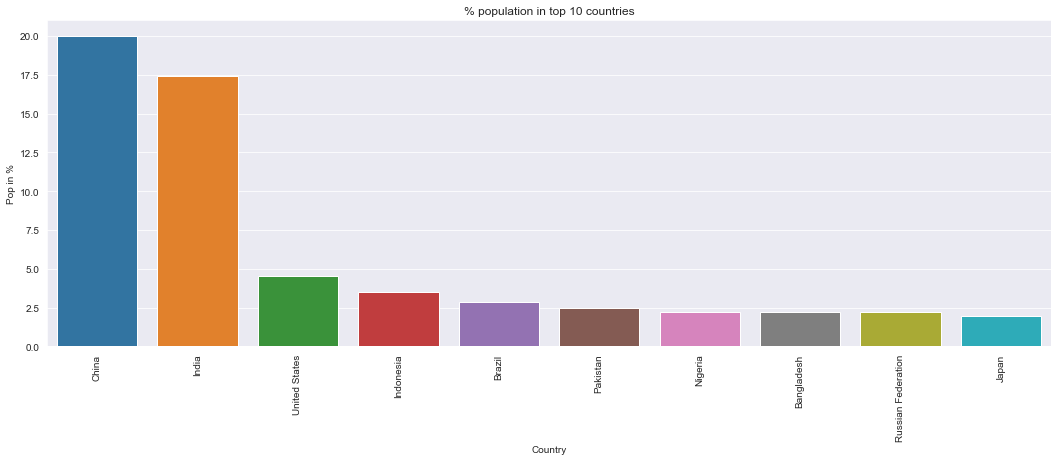

In [72]:
plt.figure(figsize=(18,6))
sns.barplot(df_pop.head(10)['Country'] , df_pop.head(10)['Pop in %'])
plt.xticks(rotation = 90) 
plt.title('% population in top 10 countries') 
plt.show()

India and China combined has almost 38% of worlds population.

In [73]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Internet Usage'].mean()
    list.append(country)
    list1.append(mean1)

In [74]:
df_tech = pd.DataFrame()
df_tech['Country'] = list
df_tech['Internet Usage'] = list1
df_tech.dropna(inplace=True)
df_tech = df_tech.sort_values(by=['Internet Usage'], ascending = False) 
df_tech = df_tech.reset_index()
df_tech.drop(columns=['index'], inplace=True) 
df_tech # countries listed according to their tech advancement  

,Country,Internet Usage
0,Iceland,0.815385
1,Norway,0.800000
2,Sweden,0.792308
3,Denmark,0.776923
4,Netherlands,0.753846
...,...,...
194,Guinea,0.000000
195,Cote d'Ivoire,0.000000
196,Ethiopia,0.000000
197,Eritrea,0.000000


In [75]:
df_tech_top_bottom = df_tech.head(10) 
df_tech_top_bottom =df_tech_top_bottom.append(df_tech.tail(10))

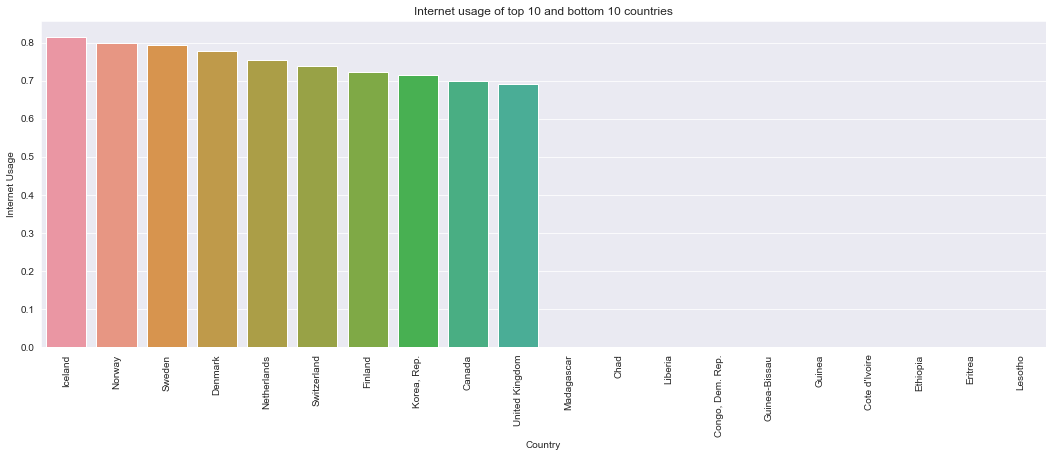

In [76]:
plt.figure(figsize=(18,6))
sns.barplot(df_tech_top_bottom['Country'] , df_tech_top_bottom['Internet Usage'])
plt.xticks(rotation = 90) 
plt.title('Internet usage of top 10 and bottom 10 countries') 
plt.show()

The following charts shows the consumption of the internet according to the countries

In [77]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Days to Start Business'].mean()
    list.append(country)
    list1.append(mean1)

In [78]:
df_biz = pd.DataFrame()
df_biz['Country'] = list
df_biz['Days to Start Business'] = list1
df_biz.dropna(inplace=True)
df_biz = df_biz.sort_values(by=['Days to Start Business'], ascending = True) 
df_biz = df_biz.reset_index()
df_biz.drop(columns=['index'], inplace=True) 
df_biz # countries listed according to their ease of business

,Country,Days to Start Business
0,Australia,3.000000
1,Canada,4.000000
2,Singapore,4.807692
3,Iceland,5.000000
4,United States,5.500000
...,...,...
180,"Venezuela, RB",141.230769
181,Timor-Leste,145.384615
182,Haiti,177.730769
183,Guinea-Bissau,205.653846


In [79]:
df_biz_top_bottom = df_biz.head(10) 
df_biz_top_bottom =df_biz_top_bottom.append(df_biz.tail(10))

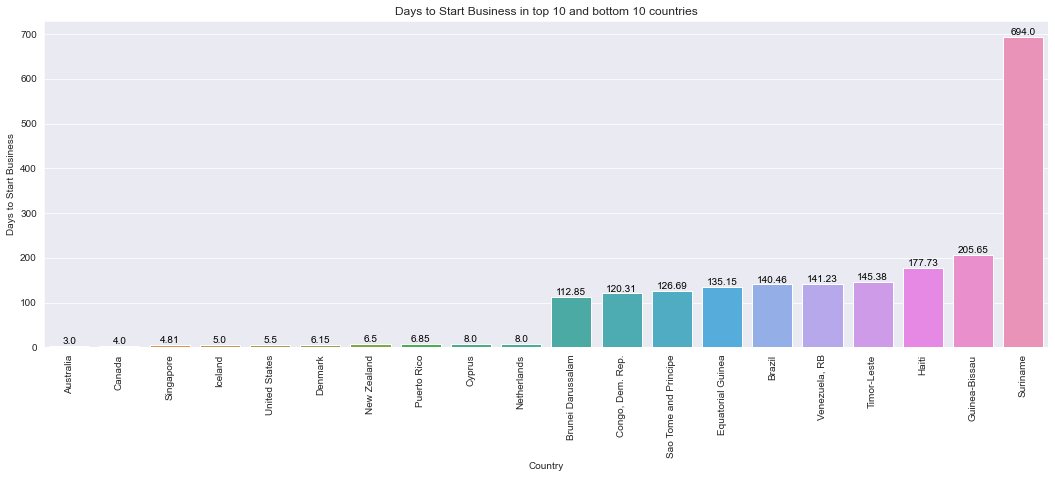

In [80]:
plt.figure(figsize=(18,6))
sns.barplot(df_biz_top_bottom['Country'] , df_biz_top_bottom['Days to Start Business'])
for i, value in enumerate(df_biz_top_bottom['Days to Start Business']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom', color='black')
plt.xticks(rotation = 90) 
plt.title('Days to Start Business in top 10 and bottom 10 countries') 
plt.show()

The following numbers shows the average time in days to start a business in that country

In [81]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Lending Interest'].mean()
    list.append(country)
    list1.append(mean1)

In [82]:
df_loan = pd.DataFrame()
df_loan['Country'] = list
df_loan['Lending Interest'] = list1
df_loan['Lending Interest'] = df_loan['Lending Interest'] * 100
df_loan.dropna(inplace=True)
df_loan = df_loan.sort_values(by=['Lending Interest'], ascending = True) 
df_loan = df_loan.reset_index()
df_loan.drop(columns=['index'], inplace=True) 
df_loan # countries listed according to their ease of business

,Country,Lending Interest
0,Japan,1.769231
1,Netherlands,3.269231
2,Switzerland,3.269231
3,Ireland,3.423077
4,United Kingdom,3.430769
...,...,...
158,Madagascar,36.915385
159,"Congo, Dem. Rep.",46.853846
160,Brazil,50.900000
161,Angola,51.230769


In [83]:
df_loan_top_bottom = df_loan.head(10) 
df_loan_top_bottom =df_loan_top_bottom.append(df_loan.tail(10))

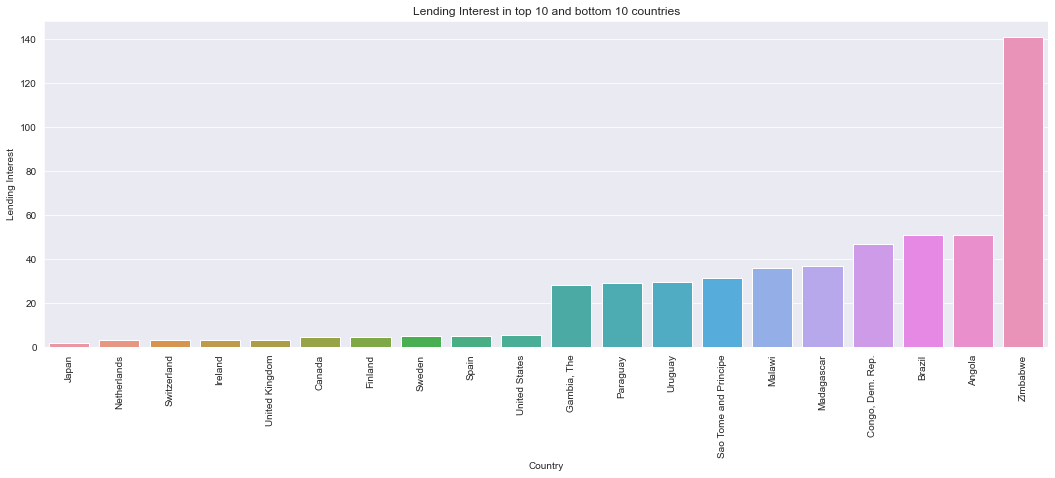

In [84]:
plt.figure(figsize=(18,6))
sns.barplot(df_loan_top_bottom['Country'] , df_loan_top_bottom['Lending Interest'])
plt.xticks(rotation = 90) 
plt.title('Lending Interest in top 10 and bottom 10 countries') 
plt.show()

The following charts shows the lending interest in the top 10 and bottom 10 countries according to their interest charged

In [85]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Population Urban'].mean()
    list.append(country)
    list1.append(mean1)

In [86]:
df_urban = pd.DataFrame()
df_urban['Country'] = list
df_urban['Population Urban'] = list1
df_urban.dropna(inplace=True)
df_urban = df_urban.sort_values(by=['Population Urban'], ascending = False) 
df_urban = df_urban.reset_index()
df_urban.drop(columns=['index'], inplace=True) 
df_urban # countries listed according to their urbanisation 

,Country,Population Urban
0,"Hong Kong SAR, China",1.000000
1,Bermuda,1.000000
2,"Macao SAR, China",1.000000
3,Monaco,1.000000
4,Sint Maarten (Dutch part),1.000000
...,...,...
201,Liechtenstein,0.147000
202,Uganda,0.134077
203,Papua New Guinea,0.130923
204,Trinidad and Tobago,0.097462


In [87]:
df_urban_top_bottom = df_urban.head(10) 
df_urban_top_bottom =df_urban_top_bottom.append(df_urban.tail(10))

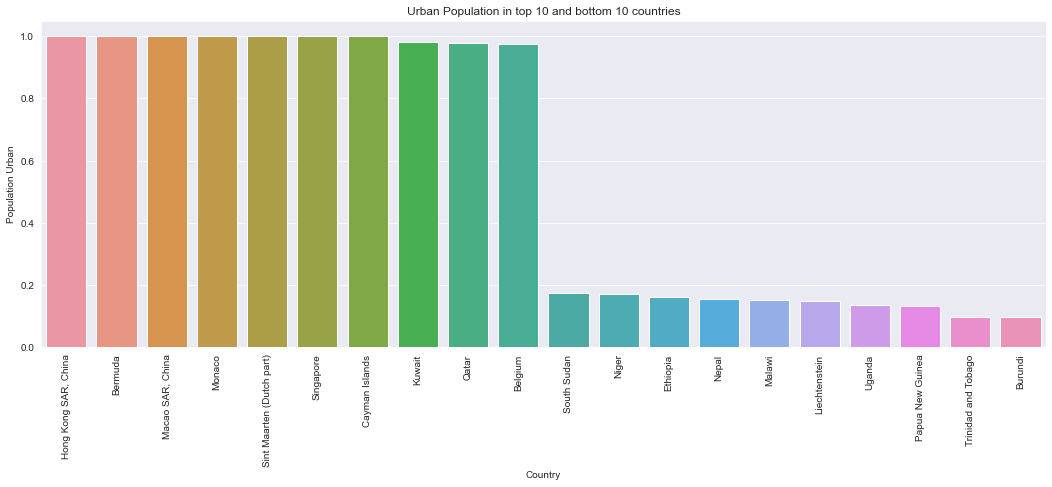

In [88]:
plt.figure(figsize=(18,6))
sns.barplot(df_urban_top_bottom['Country'] , df_urban_top_bottom['Population Urban'])
plt.xticks(rotation = 90) 
plt.title('Urban Population in top 10 and bottom 10 countries') 
plt.show()

Urbanization refers to the population shift from rural to urban areas, and corresponding decrease in the proportion of people living in rural areas. It takes place due to Employment opportunities, educational institutions and urban lifestyle and health facilities in cities. Usually urbanised countries are considered as industrialised countries because both urbanisation and industrialisation happens hand in hand.

In [89]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Tourism Inbound'].mean()
    list.append(country)
    list1.append(mean1)

In [90]:
df_revenue = pd.DataFrame()
df_revenue['Country'] = list
df_revenue['Tourism Inbound'] = list1
df_revenue.dropna(inplace=True)
df_revenue = df_revenue.sort_values(by=['Tourism Inbound'], ascending = False) 
df_revenue = df_revenue.reset_index()
df_revenue.drop(columns=['index'], inplace=True) 
df_revenue # countries listed according to their revenue from tourism  

,Country,Tourism Inbound
0,United States,1.408008e+11
1,France,5.366615e+10
2,Spain,5.319662e+10
3,Germany,4.097346e+10
4,United Kingdom,3.851877e+10
...,...,...
187,Papua New Guinea,4.684615e+06
188,Marshall Islands,4.007692e+06
189,Guinea,3.188462e+06
190,Kiribati,2.946154e+06


In [91]:
list = []
list1 = []

for country in df['Country'].unique():
    
    mean1 = df[df['Country'] == country]['Tourism Outbound'].mean()
    list.append(country)
    list1.append(mean1)

In [92]:
df_tourism_expd = pd.DataFrame()
df_tourism_expd['Country'] = list
df_tourism_expd['Tourism Outbound'] = list1
df_tourism_expd.dropna(inplace=True)
df_tourism_expd = df_tourism_expd.sort_values(by=['Tourism Outbound'], ascending = False) 
df_tourism_expd = df_tourism_expd.reset_index()
df_tourism_expd.drop(columns=['index'], inplace=True) 
df_tourism_expd # countries listed according to their tourism_expd from tourism  

,Country,Tourism Outbound
0,United States,1.024878e+11
1,Germany,8.320438e+10
2,United Kingdom,6.511962e+10
3,France,3.977977e+10
4,Japan,3.958808e+10
...,...,...
181,"Gambia, The",8.307692e+06
182,"Micronesia, Fed. Sts.",6.692308e+06
183,Tajikistan,6.553846e+06
184,Sao Tome and Principe,1.246154e+06


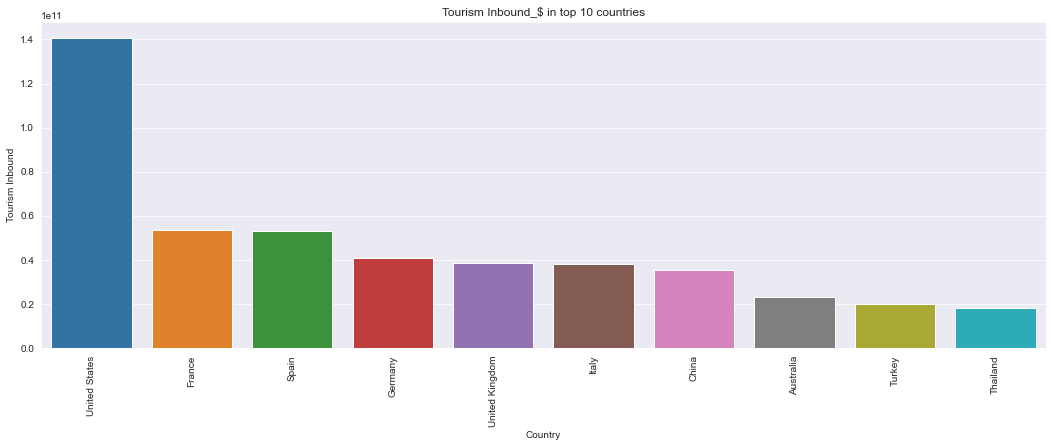

In [93]:
plt.figure(figsize=(18,6))
sns.barplot(df_revenue['Country'].head(10) , df_revenue['Tourism Inbound'].head(10))
plt.xticks(rotation = 90) 
plt.title('Tourism Inbound_$ in top 10 countries') 
plt.show()

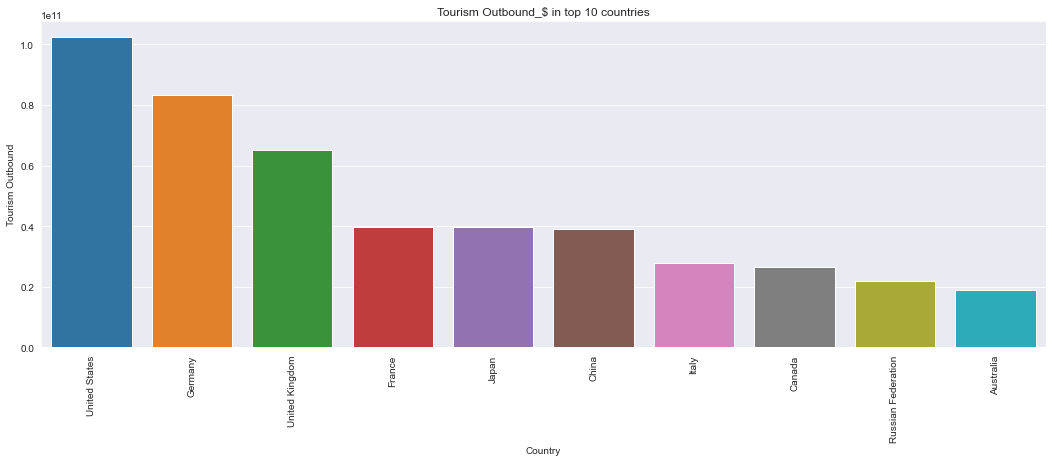

In [94]:
plt.figure(figsize=(18,6))
sns.barplot(df_tourism_expd['Country'].head(10) , df_tourism_expd['Tourism Outbound'].head(10))
plt.xticks(rotation = 90) 
plt.title('Tourism Outbound_$ in top 10 countries') 
plt.show()

The above charts show the top 10 countries according to their tourism inbound and outbound

# Data Preprocessing

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   Business Tax Rate       2704 non-null   float64
 2   CO2 Emissions           2704 non-null   float64
 3   Days to Start Business  2704 non-null   float64
 4   Energy Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health Exp % GDP        2704 non-null   float64
 7   Health Exp/Capita       2704 non-null   float64
 8   Hours to do Tax         2704 non-null   float64
 9   Infant Mortality Rate   2704 non-null   float64
 10  Internet Usage          2704 non-null   float64
 11  Lending Interest        2704 non-null   float64
 12  Life Expectancy Female  2704 non-null   float64
 13  Life Expectancy Male    2704 non-null   float64
 14  Mobile Phone Usage      2704 non-null   

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [97]:
data_norm = scaler.fit_transform(df2)
data_norm 

array([[2.82608696e-01, 1.95527350e-01, 1.06100181e-02, ...,
        5.63180828e-01, 5.06268888e-04, 1.52323406e-03],
       [9.34782609e-01, 1.32668480e-01, 1.15061329e-03, ...,
        2.63616558e-01, 1.66424027e-04, 1.15190625e-03],
       [7.82608696e-01, 1.96433968e-01, 1.94282894e-04, ...,
        3.27886710e-01, 3.81325925e-04, 3.93449461e-04],
       ...,
       [1.73913043e-01, 1.01843457e-01, 6.96160258e-04, ...,
        9.43355120e-01, 1.11014322e-02, 8.12022804e-03],
       [2.82608696e-01, 1.62284678e-01, 2.19169205e-02, ...,
        8.79084967e-01, 4.51443916e-03, 2.52961142e-02],
       [8.69565217e-02, 1.02750076e-01, 6.46201800e-05, ...,
        9.44444444e-01, 6.16368628e-03, 1.53903524e-03]])

In [98]:
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA() 

In [99]:
data_pca = pca.fit_transform(data_norm)
data_pca

array([[ 2.07925154e-01, -2.01396684e-01, -2.04467041e-01, ...,
        -2.02809744e-03,  6.40780243e-06,  5.85533272e-18],
       [ 1.26280748e+00,  3.83966360e-01,  6.47841264e-02, ...,
        -4.41292661e-03, -6.20513598e-05, -2.78088759e-18],
       [ 9.49463227e-01,  1.96381339e-01, -2.00470201e-02, ...,
        -3.18975435e-03,  1.35104881e-05, -6.72233664e-19],
       ...,
       [-6.68593452e-01,  1.76268488e-01, -1.21509397e-01, ...,
        -3.47533524e-05, -1.50930736e-03,  2.94878629e-19],
       [-3.58839561e-01,  1.26619841e-01, -2.94591306e-01, ...,
        -4.00108745e-03,  1.45946612e-04, -1.88294287e-19],
       [-6.93632752e-01,  3.97815626e-02, -1.60655291e-01, ...,
         6.56652144e-04, -1.64792272e-03, -3.05634719e-20]])

In [100]:
var = pca.explained_variance_ratio_ 
var  

array([6.06221487e-01, 7.57281879e-02, 6.31498716e-02, 4.81274403e-02,
       4.50626667e-02, 3.30735073e-02, 2.49012440e-02, 2.01295112e-02,
       1.68804231e-02, 1.44545143e-02, 1.22222977e-02, 1.07685086e-02,
       9.69417932e-03, 8.18622306e-03, 4.64535589e-03, 2.56145718e-03,
       1.61246523e-03, 1.08012550e-03, 9.57788096e-04, 4.75735385e-04,
       6.58145253e-05, 1.19578872e-06, 2.79211341e-35])

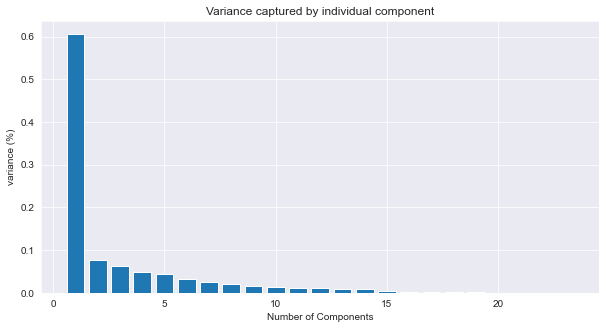

In [101]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)

plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [102]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([ 60.62,  68.19,  74.5 ,  79.31,  83.82,  87.13,  89.62,  91.63,
        93.32,  94.77,  95.99,  97.07,  98.04,  98.86,  99.32,  99.58,
        99.74,  99.85,  99.95, 100.  , 100.01, 100.01, 100.01])

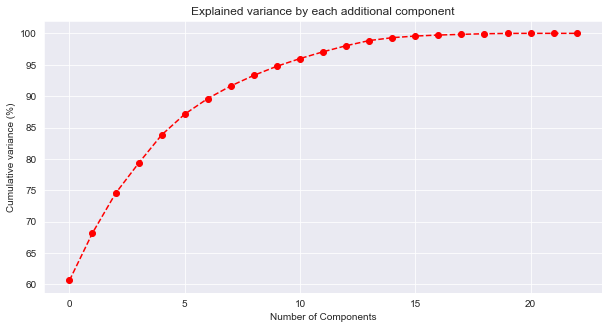

In [103]:
# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show() 

In [104]:
#first 13 PCs
pca = PCA(n_components=13)
data_pca = pca.fit_transform(data_norm)
data_pca

array([[ 0.20792515, -0.20139668, -0.20446704, ...,  0.00351747,
        -0.01298863, -0.05877959],
       [ 1.26280748,  0.38396636,  0.06478413, ..., -0.06503841,
        -0.01633303,  0.04839026],
       [ 0.94946323,  0.19638134, -0.02004702, ..., -0.06652618,
        -0.06096082,  0.00812441],
       ...,
       [-0.66859345,  0.17626849, -0.1215094 , ..., -0.08090942,
        -0.0685492 ,  0.05310659],
       [-0.35883956,  0.12661984, -0.29459131, ...,  0.13258982,
         0.04597693,  0.06206449],
       [-0.69363275,  0.03978156, -0.16065529, ..., -0.09228811,
        -0.03869323,  0.05935587]])

In [105]:
var = pca.explained_variance_ratio_ 
var

array([0.60622149, 0.07572819, 0.06314987, 0.04812744, 0.04506267,
       0.03307351, 0.02490124, 0.02012951, 0.01688042, 0.01445451,
       0.0122223 , 0.01076851, 0.00969418])

In [106]:
#Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1 

array([60.62, 68.19, 74.5 , 79.31, 83.82, 87.13, 89.62, 91.63, 93.32,
       94.77, 95.99, 97.07, 98.04])

In [107]:
# Creating a df with PC0, PC1, PC2...PC12 columns for clustering purpose.

data_pca = pd.DataFrame(data=data_pca, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
data_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.207925,-0.201397,-0.204467,-0.031142,0.125120,0.008283,-0.075465,0.051813,-0.097900,-0.053634,0.003517,-0.012989,-0.058780
1,1.262807,0.383966,0.064784,-0.220232,0.014222,0.033271,-0.030261,-0.125474,0.020468,-0.089802,-0.065038,-0.016333,0.048390
2,0.949463,0.196381,-0.020047,-0.054520,0.022645,-0.017811,-0.066236,0.005496,-0.022851,-0.029622,-0.066526,-0.060961,0.008124
3,0.609936,0.020540,-0.105065,-0.085610,0.082550,-0.015482,0.139397,-0.298693,-0.074151,-0.039116,0.030058,0.022077,0.032000
4,1.130539,0.183496,0.159985,-0.017823,-0.051986,-0.003454,-0.043943,-0.082208,0.017257,-0.026380,-0.038540,-0.073675,-0.021941


In [108]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC0     2704 non-null   float64
 1   PC1     2704 non-null   float64
 2   PC2     2704 non-null   float64
 3   PC3     2704 non-null   float64
 4   PC4     2704 non-null   float64
 5   PC5     2704 non-null   float64
 6   PC6     2704 non-null   float64
 7   PC7     2704 non-null   float64
 8   PC8     2704 non-null   float64
 9   PC9     2704 non-null   float64
 10  PC10    2704 non-null   float64
 11  PC11    2704 non-null   float64
 12  PC12    2704 non-null   float64
dtypes: float64(13)
memory usage: 274.8 KB


In [109]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the PCA object
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

# Model Building

Hierarchical Clustering

In [110]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN
from sklearn.metrics import silhouette_score as sil 

In [111]:
linkages = ['complete', 'single', 'ward', 'average']
metrics = ['euclidean', 'l1', 'l2']
best_score = -1
best_n = None
best_linkage = None
best_metric = None

for i in range(3, 8):
    for linkage in linkages:
        for metric in metrics:
            if metric != 'euclidean' and linkage == 'ward':
                continue
            hc = AgglomerativeClustering(n_clusters=i, linkage=linkage, affinity=metric)
            y_hc = hc.fit_predict(data_pca)
            sil_score = sil(data_pca, y_hc, metric=metric)
            if sil_score > best_score:
                best_score = sil_score
                best_n = i
                best_linkage = linkage
                best_metric = metric
            print(f"For n = {i}, linkage = {linkage}, metric = {metric}, Silhouette score is {np.round(sil_score, 4)}")
print(f"The best combination is n = {best_n}, linkage = {best_linkage}, metric = {best_metric}, with a Silhouette score of {np.round(best_score, 4)}")

For n = 3, linkage = complete, metric = euclidean, Silhouette score is 0.3593
For n = 3, linkage = complete, metric = l1, Silhouette score is 0.3027
For n = 3, linkage = complete, metric = l2, Silhouette score is 0.3593
For n = 3, linkage = single, metric = euclidean, Silhouette score is 0.2096
For n = 3, linkage = single, metric = l1, Silhouette score is 0.3878
For n = 3, linkage = single, metric = l2, Silhouette score is 0.2096
For n = 3, linkage = ward, metric = euclidean, Silhouette score is 0.24
For n = 3, linkage = average, metric = euclidean, Silhouette score is 0.3854
For n = 3, linkage = average, metric = l1, Silhouette score is 0.382
For n = 3, linkage = average, metric = l2, Silhouette score is 0.3854
For n = 4, linkage = complete, metric = euclidean, Silhouette score is 0.3547
For n = 4, linkage = complete, metric = l1, Silhouette score is 0.184
For n = 4, linkage = complete, metric = l2, Silhouette score is 0.3547
For n = 4, linkage = single, metric = euclidean, Silhouette

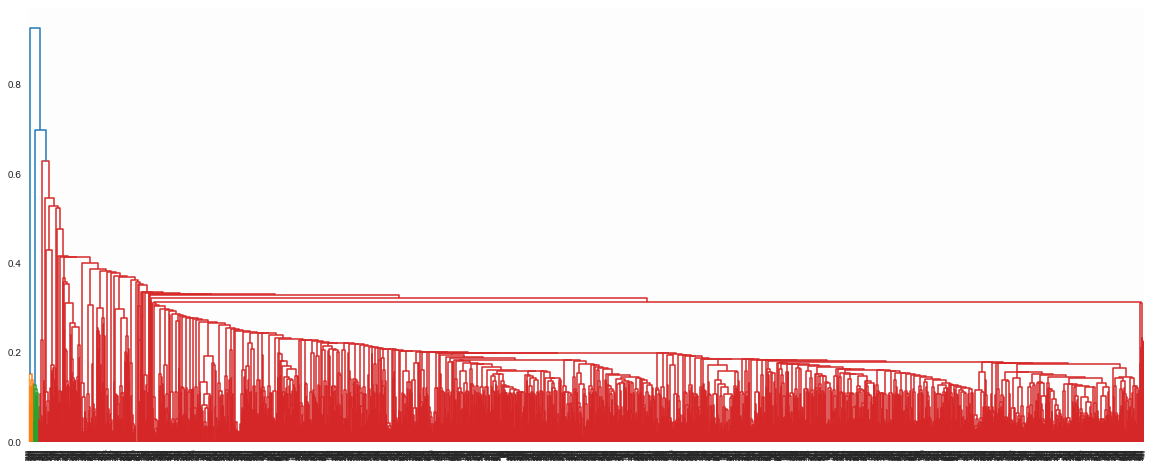

In [112]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'single')) 

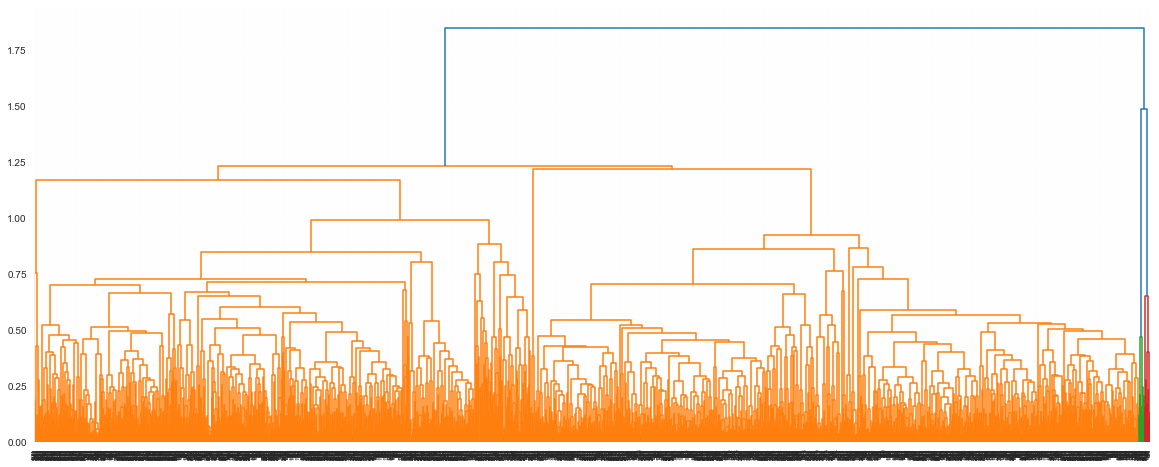

In [113]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'average')) 

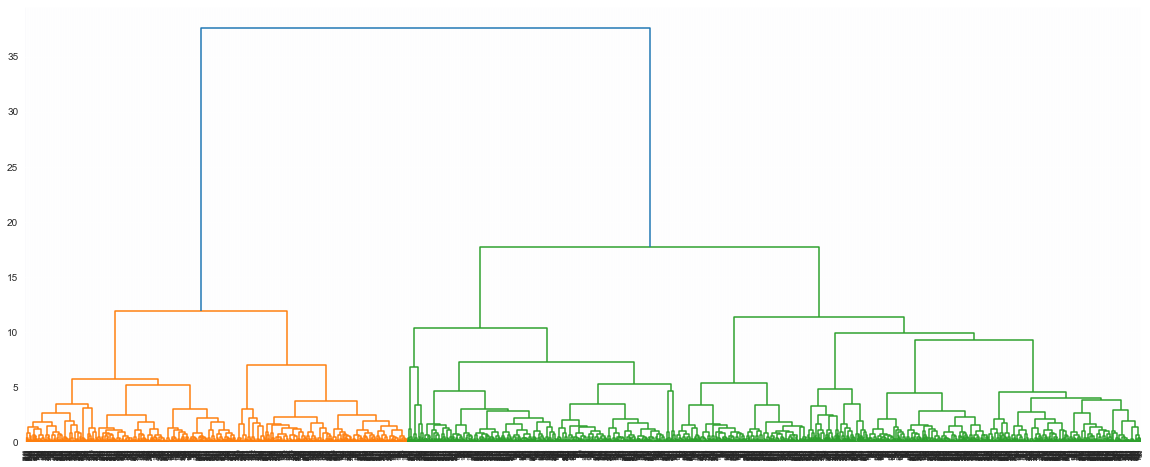

In [114]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'ward'))

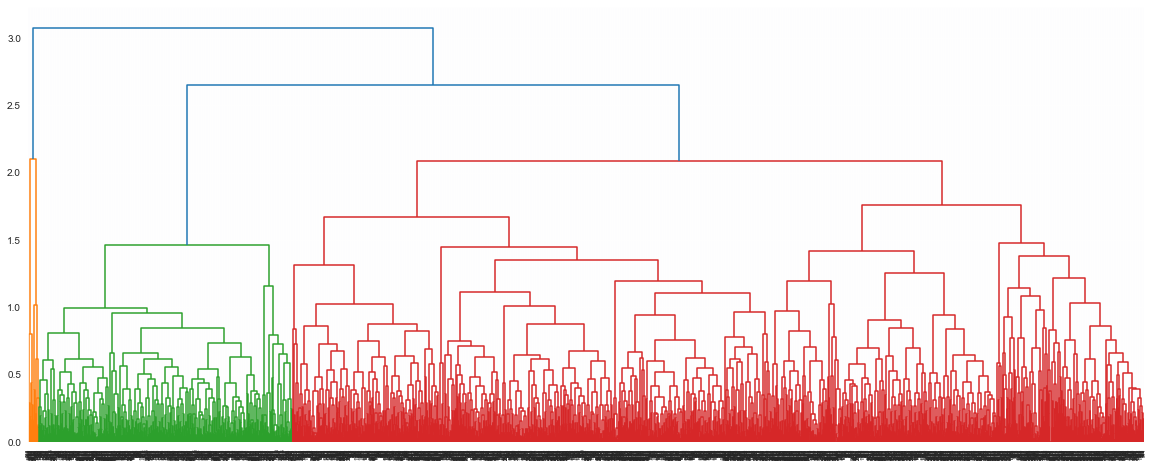

In [115]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method= 'complete'))

In [116]:
hc=AgglomerativeClustering(n_clusters=3 , linkage='complete', affinity='euclidean')
y_hc=hc.fit_predict(data_pca)

In [117]:
data1 = df1.copy()
data1['ClusterID'] = y_hc 

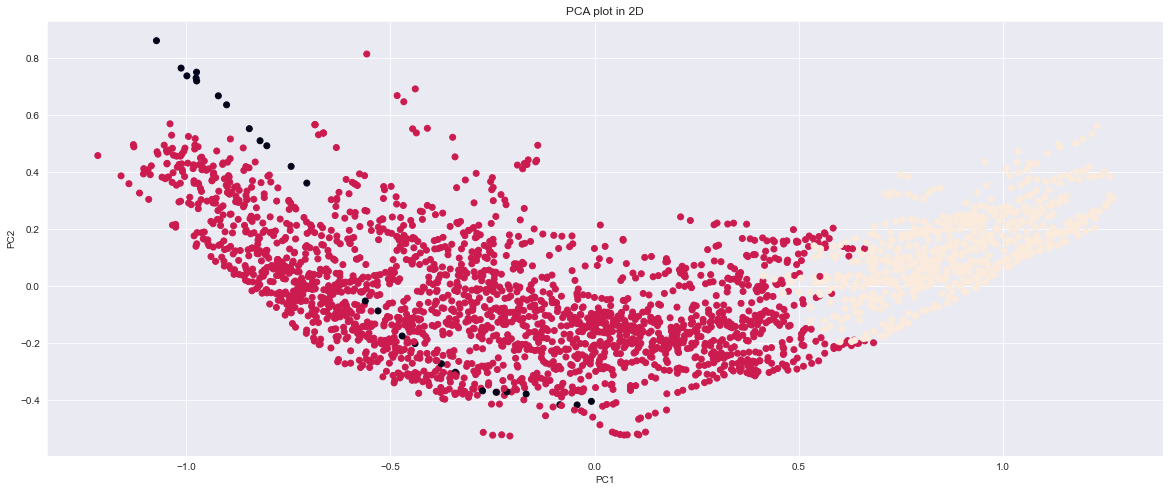

In [118]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data1['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [119]:
#some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data1['Country'].unique():
    
    mode = data1[data1['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster 

,Country,ClusterID
0,United States,0
1,China,0
2,Algeria,1
3,Switzerland,1
4,Turkey,1
...,...,...
203,"Yemen, Rep.",2
204,Madagascar,2
205,Pakistan,2
206,Lesotho,2


In [120]:
data_cluster[data_cluster['ClusterID']==0]

,Country,ClusterID
0,United States,0
1,China,0


In [121]:
data_cluster[data_cluster['ClusterID']==1]

,Country,ClusterID
2,Algeria,1
3,Switzerland,1
4,Turkey,1
5,Ukraine,1
6,United Kingdom,1
...,...,...
154,Thailand,1
155,Myanmar,1
156,Vietnam,1
157,Uzbekistan,1


In [122]:
data_cluster[data_cluster['ClusterID']==2]

,Country,ClusterID
159,Burundi,2
160,Guinea,2
161,Ghana,2
162,"Gambia, The",2
163,Haiti,2
164,Angola,2
165,Ethiopia,2
166,Eritrea,2
167,Benin,2
168,Equatorial Guinea,2


I have gone through various combinations including the best score combination but the above combination makes the most sense so we selecting this as our final Hierarchical Clustering Model.

In [123]:
country = input('Enter Name of Country:')

for i in range (0, len(data_cluster)):
    if data_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', data_cluster['ClusterID'][i]) 
        
        if data_cluster['ClusterID'][i] == 0 :
            print('Developed')
        elif data_cluster['ClusterID'][i] == 1 :
            print('Developing')
        elif data_cluster['ClusterID'][i] == 2 :
            print('Under-Developed')

Enter Name of Country:India
India Belongs To Cluster Number: 1
Developing


KMeans Clustering Model:

In [124]:
wcss = []

for i in range (2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    
wcss 

[893.1839464794521,
 704.5982031731374,
 625.737469545115,
 574.8380284571193,
 531.4009949839184,
 495.65930263717013,
 455.42346979954226,
 430.3084567460088]

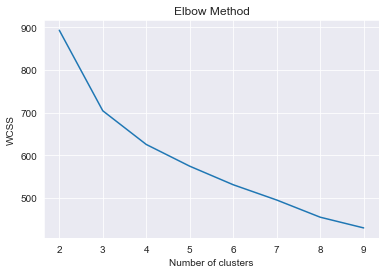

In [125]:
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

Selecting n=3

In [126]:
clusters = KMeans(n_clusters=3, random_state=42)
clusters.fit(data_pca)

KMeans(n_clusters=3, random_state=42)

In [127]:
clusters.labels_

array([2, 0, 0, ..., 1, 1, 1])

In [128]:
data2 = df1.copy()
data2['ClusterID'] =clusters.labels_ 

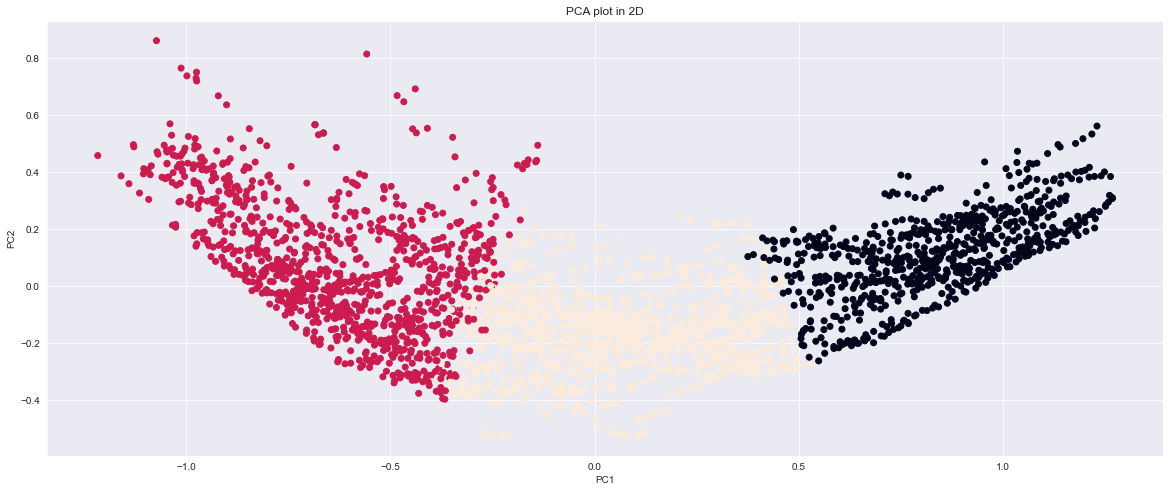

In [129]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data2['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [130]:
# but some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data2['Country'].unique():
    
    mode = data2[data2['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster

,Country,ClusterID
0,Zimbabwe,0
1,Mauritania,0
2,Mozambique,0
3,Namibia,0
4,Niger,0
...,...,...
203,Fiji,2
204,"Korea, Dem. Rep.",2
205,Kyrgyz Republic,2
206,"Micronesia, Fed. Sts.",2


In [131]:
data_cluster[data_cluster['ClusterID']==0]

,Country,ClusterID
0,Zimbabwe,0
1,Mauritania,0
2,Mozambique,0
3,Namibia,0
4,Niger,0
5,Nigeria,0
6,Rwanda,0
7,Nepal,0
8,Senegal,0
9,Sierra Leone,0


In [132]:
data_cluster[data_cluster['ClusterID']==1]

,Country,ClusterID
54,Switzerland,1
55,Ukraine,1
56,United Kingdom,1
57,Sweden,1
58,Lithuania,1
...,...,...
125,France,1
126,Estonia,1
127,Denmark,1
128,Czech Republic,1


In [133]:
data_cluster[data_cluster['ClusterID']==2]

,Country,ClusterID
130,Grenada,2
131,Tunisia,2
132,El Salvador,2
133,Ecuador,2
134,Dominican Republic,2
...,...,...
203,Fiji,2
204,"Korea, Dem. Rep.",2
205,Kyrgyz Republic,2
206,"Micronesia, Fed. Sts.",2


In [134]:
algorithms = ['auto', 'full', 'elkan']
max_iterations = [50, 100, 200, 300, 400, 500]

best_score = -1
best_algorithm = ''
best_iteration = -1

for algorithm in algorithms:
    for max_iter in max_iterations:
        kmeans = KMeans(n_clusters=3, init='k-means++', algorithm=algorithm, max_iter=max_iter, n_init=10, random_state=42)
        kmeans.fit(data_pca)
        score = sil(data_pca, kmeans.labels_)
        print(f"Algorithm: {algorithm}, Max iterations: {max_iter}, Silhouette Score: {score}")
        if score > best_score:
            best_score = score
            best_algorithm = algorithm
            best_iteration = max_iter

print(f"Best algorithm: {best_algorithm}, Best max iterations: {best_iteration}, Best silhouette score: {best_score}")

Algorithm: auto, Max iterations: 50, Silhouette Score: 0.28903022436699566
Algorithm: auto, Max iterations: 100, Silhouette Score: 0.28903022436699566
Algorithm: auto, Max iterations: 200, Silhouette Score: 0.28903022436699566
Algorithm: auto, Max iterations: 300, Silhouette Score: 0.28903022436699566
Algorithm: auto, Max iterations: 400, Silhouette Score: 0.28903022436699566
Algorithm: auto, Max iterations: 500, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 50, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 100, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 200, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 300, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 400, Silhouette Score: 0.28903022436699566
Algorithm: full, Max iterations: 500, Silhouette Score: 0.28903022436699566
Algorithm: elkan, Max iterations: 50, Silhouette Score: 0.28903022436699566
Algorithm: elk

In [135]:
clusters = KMeans(n_clusters=3, init='k-means++', algorithm='auto', max_iter=50, n_init=10, random_state=42)
clusters.fit(data_pca)

KMeans(algorithm='auto', max_iter=50, n_clusters=3, n_init=10, random_state=42)

In [166]:
joblib.dump(clusters, 'kmeans.pkl')

['kmeans.pkl']

In [136]:
clusters.labels_ 

array([2, 0, 0, ..., 1, 1, 1])

In [137]:
data3 = df1.copy()
data3['ClusterID'] =clusters.labels_

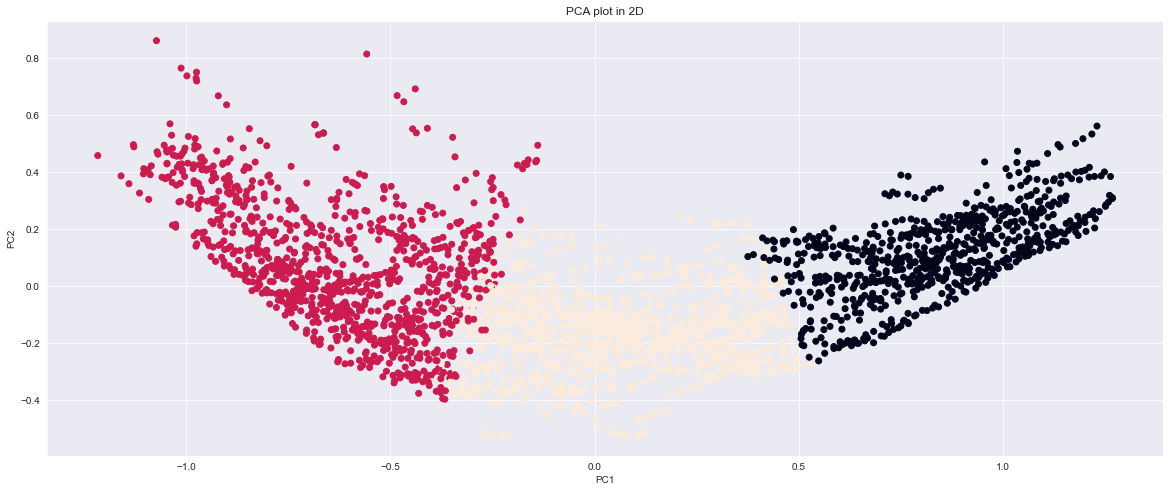

In [138]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = data3['ClusterID'])

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [139]:
# but some countries are part of different clusters so lets take mode of ClusterId for each country.. 

list = []
list1 = []
for country in data3['Country'].unique():
    
    mode = data3[data3['Country'] == country]['ClusterID'].mode()[0]
    list1.append(mode)
    list.append(country)
   
   
    
data_cluster = pd.DataFrame()
data_cluster['Country'] = list
data_cluster['ClusterID'] = list1 

data_cluster = data_cluster.sort_values(by=['ClusterID'], ascending=True) 
data_cluster = data_cluster.reset_index()
data_cluster.drop(columns=['index'], inplace=True) 
data_cluster

,Country,ClusterID
0,Zimbabwe,0
1,Mauritania,0
2,Mozambique,0
3,Namibia,0
4,Niger,0
...,...,...
203,Fiji,2
204,"Korea, Dem. Rep.",2
205,Kyrgyz Republic,2
206,"Micronesia, Fed. Sts.",2


In [140]:
data_cluster[data_cluster['ClusterID']==0]

,Country,ClusterID
0,Zimbabwe,0
1,Mauritania,0
2,Mozambique,0
3,Namibia,0
4,Niger,0
5,Nigeria,0
6,Rwanda,0
7,Nepal,0
8,Senegal,0
9,Sierra Leone,0


In [141]:
data_cluster[data_cluster['ClusterID']==1]

,Country,ClusterID
54,Switzerland,1
55,Ukraine,1
56,United Kingdom,1
57,Sweden,1
58,Lithuania,1
...,...,...
125,France,1
126,Estonia,1
127,Denmark,1
128,Czech Republic,1


In [142]:
data_cluster[data_cluster['ClusterID']==2]

,Country,ClusterID
130,Grenada,2
131,Tunisia,2
132,El Salvador,2
133,Ecuador,2
134,Dominican Republic,2
...,...,...
203,Fiji,2
204,"Korea, Dem. Rep.",2
205,Kyrgyz Republic,2
206,"Micronesia, Fed. Sts.",2


In [143]:
country = input('Enter Name of Country:')

for i in range (0, len(data_cluster)):
    if data_cluster['Country'][i] == country:
        print(country, 'Belongs To Cluster Number:', data_cluster['ClusterID'][i]) 
        
        if data_cluster['ClusterID'][i] == 0 :
            print('Under-Developed')
        elif data_cluster['ClusterID'][i] == 1 :
            print('Developed')
        elif data_cluster['ClusterID'][i] == 2 :
            print('Developing')

Enter Name of Country:India
India Belongs To Cluster Number: 2
Developing


DBScan Model

In [144]:
eps_values = [0.5,0.4,0.6]
min_samples_values = [5, 10, 15, 20]
metrics = ['euclidean', 'manhattan']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

best_score = -1
best_eps = -1
best_min_samples = -1
best_metric = ''
best_algorithm = ''

for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for algorithm in algorithms:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm)
                dbscan.fit(data_pca)
                labels = dbscan.labels_
                score = sil(data_pca, labels)
                print(f"Eps: {eps}, Min samples: {min_samples}, Metric: {metric}, Algorithm: {algorithm}, Silhouette Score: {score}")
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_metric = metric
                    best_algorithm = algorithm

print(f"Best eps: {best_eps}, Best min samples: {best_min_samples}, Best metric: {best_metric}, Best algorithm: {best_algorithm}, Best silhouette score: {best_score}")

Eps: 0.5, Min samples: 5, Metric: euclidean, Algorithm: auto, Silhouette Score: 0.08209412910767093
Eps: 0.5, Min samples: 5, Metric: euclidean, Algorithm: ball_tree, Silhouette Score: 0.08209412910767093
Eps: 0.5, Min samples: 5, Metric: euclidean, Algorithm: kd_tree, Silhouette Score: 0.08209412910767093
Eps: 0.5, Min samples: 5, Metric: euclidean, Algorithm: brute, Silhouette Score: 0.08209412910767093
Eps: 0.5, Min samples: 5, Metric: manhattan, Algorithm: auto, Silhouette Score: -0.004982412411695776
Eps: 0.5, Min samples: 5, Metric: manhattan, Algorithm: ball_tree, Silhouette Score: -0.004982412411695776
Eps: 0.5, Min samples: 5, Metric: manhattan, Algorithm: kd_tree, Silhouette Score: -0.004982412411695776
Eps: 0.5, Min samples: 5, Metric: manhattan, Algorithm: brute, Silhouette Score: -0.004982412411695776
Eps: 0.5, Min samples: 10, Metric: euclidean, Algorithm: auto, Silhouette Score: 0.08209412910767093
Eps: 0.5, Min samples: 10, Metric: euclidean, Algorithm: ball_tree, Silho

Eps: 0.6, Min samples: 15, Metric: euclidean, Algorithm: auto, Silhouette Score: 0.35940756372717897
Eps: 0.6, Min samples: 15, Metric: euclidean, Algorithm: ball_tree, Silhouette Score: 0.35940756372717897
Eps: 0.6, Min samples: 15, Metric: euclidean, Algorithm: kd_tree, Silhouette Score: 0.35940756372717897
Eps: 0.6, Min samples: 15, Metric: euclidean, Algorithm: brute, Silhouette Score: 0.35940756372717897
Eps: 0.6, Min samples: 15, Metric: manhattan, Algorithm: auto, Silhouette Score: -0.11214660839726216
Eps: 0.6, Min samples: 15, Metric: manhattan, Algorithm: ball_tree, Silhouette Score: -0.11214660839726216
Eps: 0.6, Min samples: 15, Metric: manhattan, Algorithm: kd_tree, Silhouette Score: -0.11214660839726216
Eps: 0.6, Min samples: 15, Metric: manhattan, Algorithm: brute, Silhouette Score: -0.11214660839726216
Eps: 0.6, Min samples: 20, Metric: euclidean, Algorithm: auto, Silhouette Score: 0.36013750498016367
Eps: 0.6, Min samples: 20, Metric: euclidean, Algorithm: ball_tree, S

In [145]:
dbscan = DBSCAN(eps=0.6, min_samples=20) # min_samples > = no of columns
dbscan.fit(data_pca)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

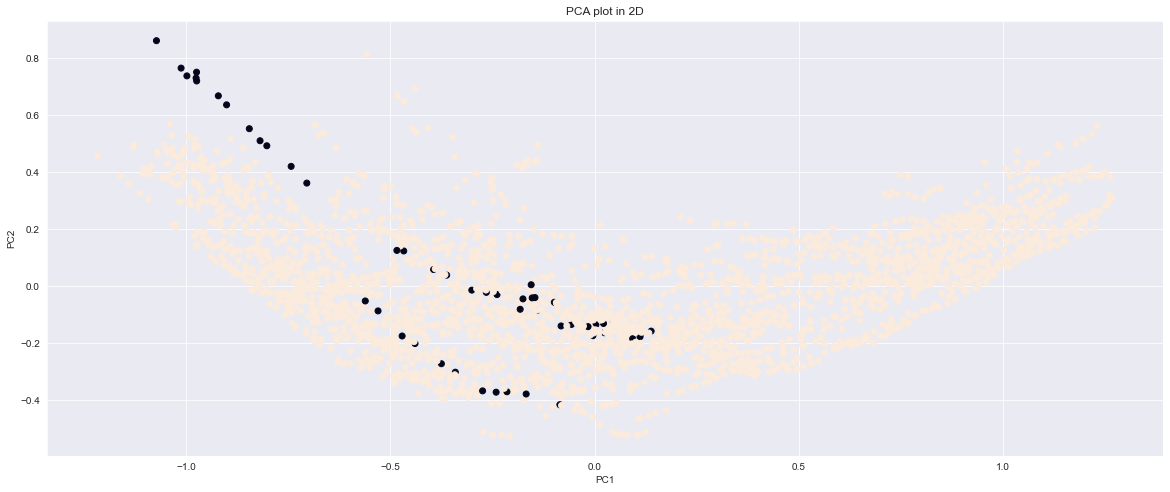

In [146]:
plt.figure(figsize=(20,8))
plt.scatter(data_pca.iloc[:,0] , data_pca.iloc[:,1], c = dbscan.labels_)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We are using kmeans clustering as our final model 

# Predict 

As we know the folowing clusters represent the following meanings

1. 0 represents Under-Developed

2. 1 represents Developed

3. 2 represents Developing

Testing with a neew data point

In [147]:
new_data = pd.DataFrame({'Birth Rate':0.026,'Business Tax Rate':0.2, 'CO2 Emissions':1186663.0, 'Days to Start Business':3, 'Energy Usage':457198.0,
       'GDP':10289700000000, 'Health Exp % GDP':0.043, 'Health Exp/Capita':20.0, 'Hours to do Tax':264.0,
       'Infant Mortality Rate':0.067, 'Internet Usage':0.0, 'Lending Interest':0.123,
       'Life Expectancy Female':63.0, 'Life Expectancy Male':61.0, 'Mobile Phone Usage':0.0, 'Number of Records':1.0,
       'Population 0-14':0.342, 'Population 15-64':0.614, 'Population 65+':0.044,
       'Population Total':1.042262e+09, 'Population Urban':0.277, 'Tourism Inbound':3.598000e+09,
       'Tourism Outbound':3.686000e+09}, index=[0]) 
                      
new_data      

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.026,0.2,1186663.0,3,457198.0,10289700000000,0.043,20.0,264.0,0.067,...,61.0,0.0,1.0,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09


In [148]:
# Apply the same preprocessing steps
new_data_norm = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_norm)

In [149]:
new_data_clusters = clusters.predict(new_data_pca)
print(new_data_clusters)

[2]


Testing with a United States data point which should come as 1(Developed)

In [150]:
df1[df1['Country']=='United States']

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
204,0.014,0.464,5713560.0,5.5,2273332.0,1.028970e+13,0.136,4790.0,187.0,0.007,...,0.4,1.0,0.213,0.663,0.124,282162411.0,0.791,1.209120e+11,9.147300e+10,United States
412,0.014,0.464,5601405.0,5.5,2230817.0,1.062530e+13,0.142,5138.0,187.0,0.007,...,0.4,1.0,0.212,0.665,0.123,284968955.0,0.792,1.091030e+11,8.561000e+10,United States
620,0.014,0.464,5650950.0,5.5,2255957.0,1.098020e+13,0.151,5578.0,187.0,0.007,...,0.5,1.0,0.210,0.667,0.123,287625193.0,0.794,1.044270e+11,8.186000e+10,United States
828,0.014,0.464,5681664.0,6.0,2261151.0,1.151220e+13,0.156,5993.0,187.0,0.007,...,0.5,1.0,0.209,0.669,0.123,290107933.0,0.796,1.015350e+11,8.209100e+10,United States
1036,0.014,0.464,5790765.0,6.0,2307819.0,1.227700e+13,0.157,6355.0,187.0,0.007,...,0.6,1.0,0.207,0.670,0.123,292805298.0,0.798,1.156890e+11,9.476400e+10,United States
1244,0.014,0.458,5826394.0,6.0,2318861.0,1.309540e+13,0.158,6732.0,325.0,0.007,...,0.7,1.0,0.205,0.671,0.123,295516599.0,0.799,1.272370e+11,1.002500e+11,United States
1452,0.014,0.474,5737616.0,6.0,2296686.0,1.385790e+13,0.159,7110.0,325.0,0.007,...,0.8,1.0,0.204,0.672,0.124,298379912.0,0.801,1.333930e+11,1.054760e+11,United States
1660,0.014,0.461,5828697.0,6.0,2337014.0,1.448030e+13,0.161,7486.0,325.0,0.007,...,0.8,1.0,0.202,0.673,0.125,301231207.0,0.803,1.488460e+11,1.111020e+11,United States
1868,0.014,0.464,5656839.0,5.0,2277034.0,1.472030e+13,0.165,7769.0,187.0,0.007,...,0.9,1.0,0.201,0.673,0.127,304093966.0,0.804,1.705240e+11,1.192170e+11,United States
2076,0.014,0.461,5311840.0,5.0,2164458.0,1.441790e+13,0.177,8009.0,187.0,0.006,...,0.9,1.0,0.200,0.672,0.128,306771529.0,0.806,1.495100e+11,1.062850e+11,United States


In [151]:
row = df2.iloc[2700]

In [152]:
row

Birth Rate                1.300000e-02
Business Tax Rate         4.640000e-01
CO2 Emissions             5.681664e+06
Days to Start Business    5.000000e+00
Energy Usage              2.132446e+06
GDP                       1.624460e+13
Health Exp % GDP          1.790000e-01
Health Exp/Capita         8.895000e+03
Hours to do Tax           1.750000e+02
Infant Mortality Rate     6.000000e-03
Internet Usage            8.000000e-01
Lending Interest          3.300000e-02
Life Expectancy Female    8.100000e+01
Life Expectancy Male      7.600000e+01
Mobile Phone Usage        1.000000e+00
Number of Records         1.000000e+00
Population 0-14           1.960000e-01
Population 15-64          6.670000e-01
Population 65+            1.360000e-01
Population Total          3.138737e+08
Population Urban          8.110000e-01
Tourism Inbound           2.000920e+11
Tourism Outbound          1.265730e+11
Name: 2700, dtype: float64

In [153]:
row_array = row.values

In [154]:
row_array = row_array.reshape(1, -1)

In [155]:
row_array

array([[1.30000000e-02, 4.64000000e-01, 5.68166400e+06, 5.00000000e+00,
        2.13244600e+06, 1.62446000e+13, 1.79000000e-01, 8.89500000e+03,
        1.75000000e+02, 6.00000000e-03, 8.00000000e-01, 3.30000000e-02,
        8.10000000e+01, 7.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.96000000e-01, 6.67000000e-01, 1.36000000e-01, 3.13873685e+08,
        8.11000000e-01, 2.00092000e+11, 1.26573000e+11]])

In [156]:
# Apply the same preprocessing steps
new_data_norm = scaler.transform(row_array)
new_data_pca = pca.transform(new_data_norm)

In [157]:
new_data_clusters = clusters.predict(new_data_pca)
print(new_data_clusters)

[1]


Testing with a India datapoint which should come as 2(Developing)

In [158]:
df1[df1['Country']=='India']

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
63,0.026,0.663,1186663.0,31.5,457198.0,4.766091e+11,0.043,20.0,264.0,0.067,...,0.0,1.0,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09,India
271,0.025,0.663,1203843.0,31.5,464501.0,4.939543e+11,0.045,21.0,264.0,0.064,...,0.0,1.0,0.338,0.617,0.044,1.059501e+09,0.279,3.342000e+09,4.367000e+09,India
479,0.025,0.663,1226791.0,31.5,477540.0,5.239686e+11,0.044,21.0,264.0,0.062,...,0.0,1.0,0.334,0.621,0.045,1.076706e+09,0.282,3.300000e+09,4.350000e+09,India
687,0.024,0.663,1281914.0,89.0,489507.0,6.183565e+11,0.043,24.0,264.0,0.060,...,0.0,1.0,0.330,0.624,0.046,1.093787e+09,0.286,4.560000e+09,4.385000e+09,India
895,0.024,0.663,1348525.0,89.0,519165.0,7.215856e+11,0.045,29.0,264.0,0.058,...,0.0,1.0,0.326,0.627,0.046,1.110626e+09,0.289,6.307000e+09,5.783000e+09,India
1103,0.023,0.666,1411128.0,71.0,539388.0,8.342150e+11,0.042,32.0,264.0,0.056,...,0.1,1.0,0.322,0.631,0.047,1.127144e+09,0.292,7.659000e+09,8.277000e+09,India
1311,0.023,0.740,1504365.0,35.0,567182.0,9.491168e+11,0.040,33.0,264.0,0.054,...,0.1,1.0,0.318,0.634,0.048,1.143289e+09,0.296,8.915000e+09,8.738000e+09,India
1519,0.022,0.727,1611404.0,33.0,604659.0,1.238700e+12,0.039,40.0,271.0,0.052,...,0.2,1.0,0.314,0.638,0.049,1.159095e+09,0.299,1.123400e+10,1.069000e+10,India
1727,0.022,0.703,1811289.0,30.0,632956.0,1.224097e+12,0.039,43.0,271.0,0.050,...,0.3,1.0,0.310,0.641,0.049,1.174662e+09,0.302,1.246200e+10,1.208300e+10,India
1935,0.022,0.660,1982263.0,30.0,698360.0,1.365372e+12,0.039,44.0,271.0,0.048,...,0.4,1.0,0.306,0.644,0.050,1.190138e+09,0.306,1.113600e+10,9.310000e+09,India


In [159]:
row = df2.iloc[895]

In [160]:
row

Birth Rate                2.400000e-02
Business Tax Rate         6.630000e-01
CO2 Emissions             1.348525e+06
Days to Start Business    8.900000e+01
Energy Usage              5.191650e+05
GDP                       7.215856e+11
Health Exp % GDP          4.500000e-02
Health Exp/Capita         2.900000e+01
Hours to do Tax           2.640000e+02
Infant Mortality Rate     5.800000e-02
Internet Usage            0.000000e+00
Lending Interest          1.090000e-01
Life Expectancy Female    6.500000e+01
Life Expectancy Male      6.200000e+01
Mobile Phone Usage        0.000000e+00
Number of Records         1.000000e+00
Population 0-14           3.260000e-01
Population 15-64          6.270000e-01
Population 65+            4.600000e-02
Population Total          1.110626e+09
Population Urban          2.890000e-01
Tourism Inbound           6.307000e+09
Tourism Outbound          5.783000e+09
Name: 895, dtype: float64

In [161]:
row_array = row.values

In [162]:
row_array = row_array.reshape(1, -1)

In [163]:
row_array

array([[2.40000000e-02, 6.63000000e-01, 1.34852500e+06, 8.90000000e+01,
        5.19165000e+05, 7.21585608e+11, 4.50000000e-02, 2.90000000e+01,
        2.64000000e+02, 5.80000000e-02, 0.00000000e+00, 1.09000000e-01,
        6.50000000e+01, 6.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.26000000e-01, 6.27000000e-01, 4.60000000e-02, 1.11062611e+09,
        2.89000000e-01, 6.30700000e+09, 5.78300000e+09]])

In [164]:
# Apply the same preprocessing steps
new_data_norm = scaler.transform(row_array)
new_data_pca = pca.transform(new_data_norm)

In [165]:
new_data_clusters = clusters.predict(new_data_pca)
print(new_data_clusters)

[2]


As we can see it is predicting same as our model 

Using the final model and preprocessing steps using jonlib for prediction

In [169]:
scaling = joblib.load('scaler.pkl')
features = joblib.load('pca.pkl')
model = joblib.load('kmeans.pkl')

In [170]:
row_array

array([[2.40000000e-02, 6.63000000e-01, 1.34852500e+06, 8.90000000e+01,
        5.19165000e+05, 7.21585608e+11, 4.50000000e-02, 2.90000000e+01,
        2.64000000e+02, 5.80000000e-02, 0.00000000e+00, 1.09000000e-01,
        6.50000000e+01, 6.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.26000000e-01, 6.27000000e-01, 4.60000000e-02, 1.11062611e+09,
        2.89000000e-01, 6.30700000e+09, 5.78300000e+09]])

In [171]:
new_data_norm = scaling.transform(row_array)

In [172]:
new_data_pca = features.transform(new_data_norm)

In [173]:
new_data_clusters = model.predict(new_data_pca)

In [174]:
print(new_data_clusters)

[2]


As we can see our pkl files are giving the same output